In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from collections import Counter

In [3]:
data = pd.read_csv("sample_submission.csv")

data.shape

(4398, 2)

In [4]:
train_data = pd.read_csv("train.csv")
test_data= pd.read_csv("test.csv")
train_data.shape ,test_data.shape

((3000, 23), (4398, 22))

In [5]:
train_data.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [6]:
X=train_data.copy()
X_test=test_data.copy()

In [7]:
pd.DataFrame(X_test.isna().sum().sort_values(ascending=False) )

,0
belongs_to_collection,3521
homepage,2978
tagline,863
Keywords,393
production_companies,258
production_countries,102
spoken_languages,42
crew,22
genres,16
overview,14


In [8]:
pd.DataFrame(X.isna().sum().sort_values(ascending=False))

,0
belongs_to_collection,2396
homepage,2054
tagline,597
Keywords,276
production_companies,156
production_countries,55
spoken_languages,20
crew,16
cast,13
overview,8


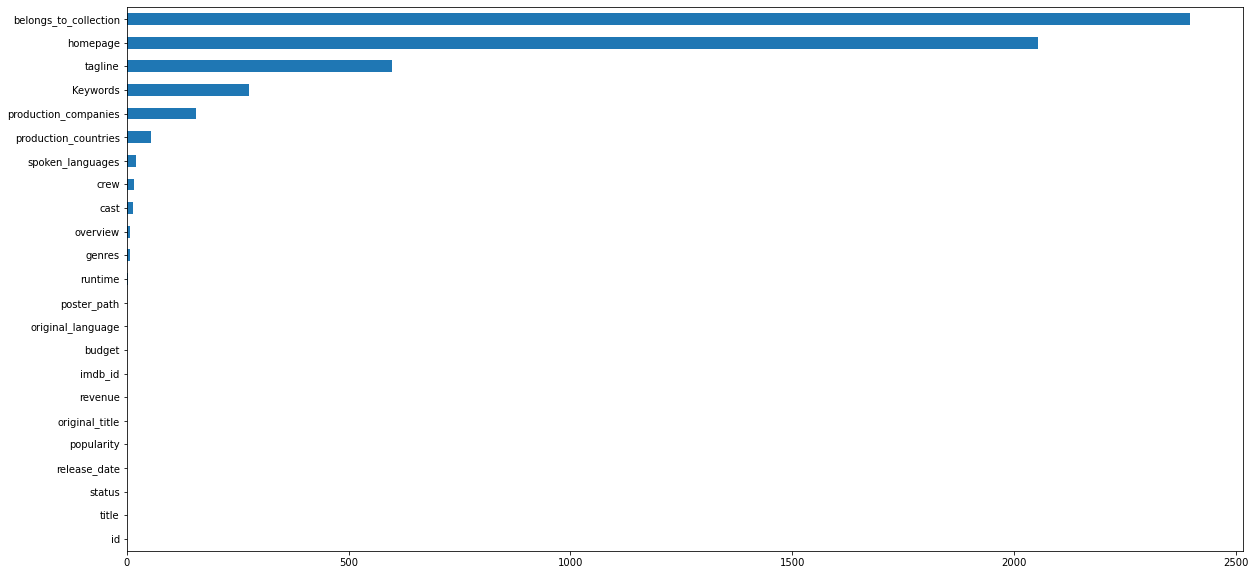

In [9]:

X.isna().sum().sort_values().plot(kind="barh", figsize=(20,10))
# X_test.isna().sum().plot(kind="barh", figsize=(20,10))

In [10]:
X.info(),X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

(None, None)

In [11]:
X.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


# Analysis

In [12]:
len(X["id"].unique())

3000

In [13]:
X.drop(labels=['id'],axis=1,inplace=True)
X_test.drop(labels=['id'],axis=1,inplace=True)

# collections

In [14]:
len(X["belongs_to_collection"].unique()),X["belongs_to_collection"].isnull().sum()

(423, 2396)

In [15]:
collection = X["belongs_to_collection"].apply(lambda x : 1 if type(x)!=float else 0)

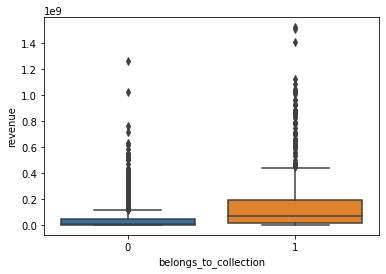

In [16]:
sns.boxplot(x=collection,y=X["revenue"])

In [17]:
X['has_collection']=collection

In [18]:
X["belongs_to_collection"].apply(lambda x: len(literal_eval(x)) if type(x)!=float else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

In [19]:
for i in range(10):
    print(X["belongs_to_collection"][i])

[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
[{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
nan
nan
nan
nan
nan
nan
[{'id': 256377, 'name': 'The Muppet Collection', 'poster_path': '/8Ew8EIdFFurMMYjSbWPu1Hl4vLX.jpg', 'backdrop_path': '/1AWd3MM90G47mxtD112gRDxSXY9.jpg'}]
nan


In [20]:
X["collection_name"] = X["belongs_to_collection"].apply(lambda x : literal_eval(x)[0]['name'] if type(x)!=float else -1)

In [21]:
X["collection_name"].value_counts()

-1                                        2396
James Bond Collection                       16
Friday the 13th Collection                   7
The Pink Panther (Original) Collection       6
Police Academy Collection                    5
                                          ... 
American Graffiti Collection                 1
The Blues Brothers Collection                1
Shaolin Temple Collection                    1
East is East Collection                      1
Alien Nation Collection                      1
Name: collection_name, Length: 423, dtype: int64

In [22]:
X.drop(labels=["belongs_to_collection"],axis=1,inplace=True)

# generes

In [23]:
X["genres"][0]

"[{'id': 35, 'name': 'Comedy'}]"

In [24]:
X['genres'] = X['genres'].apply(lambda x: literal_eval(x) if type(x)!=float else 0 )

In [25]:
X['genres_count']=X['genres'].apply(lambda x : len(x) if x != 0  else 0)

In [26]:
X['genres_count'].value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres_count, dtype: int64

In [27]:
X['genres'] = X['genres'].apply(lambda x :[i['name'] for i in x] if x!=0  else [])

In [28]:
all_generes =  X['genres'].values
all_generes

array([list(['Comedy']), list(['Comedy', 'Drama', 'Family', 'Romance']),
       list(['Drama']), ...,
       list(['Crime', 'Action', 'Mystery', 'Thriller']),
       list(['Comedy', 'Romance']),
       list(['Thriller', 'Action', 'Mystery'])], dtype=object)

In [29]:
all_generes_values = Counter([genere for row in X["genres"] for genere in row]).most_common()
all_generes_count = len(all_generes_values)

In [30]:
all_generes_count
all_generes_values

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [31]:
map_values = Counter([row[0] for row in X["genres"] if len(row)>0]).most_common()
map_values

[('Drama', 785),
 ('Comedy', 604),
 ('Action', 520),
 ('Adventure', 187),
 ('Horror', 170),
 ('Crime', 147),
 ('Thriller', 116),
 ('Animation', 76),
 ('Documentary', 71),
 ('Fantasy', 68),
 ('Romance', 67),
 ('Science Fiction', 41),
 ('Family', 36),
 ('Mystery', 33),
 ('War', 20),
 ('Music', 20),
 ('History', 16),
 ('Western', 13),
 ('Foreign', 2),
 ('TV Movie', 1)]

In [32]:
pd.DataFrame(all_generes_values)

,0,1
0,Drama,1531
1,Comedy,1028
2,Thriller,789
3,Action,741
4,Romance,571
5,Crime,469
6,Adventure,439
7,Horror,301
8,Science Fiction,290
9,Family,260


In [35]:
# X.at[0,"genres_Drama"]=1
X.head()


,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,status,tagline,title,Keywords,cast,crew,revenue,has_collection,collection_name,genres_count
0,14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,Hot Tub Time Machine Collection,1
1,40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,The Princess Diaries Collection,4
2,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,-1,1
3,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,-1,2
4,0,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,-1,2


In [36]:
X.iloc[0]["genres"]

['Comedy']

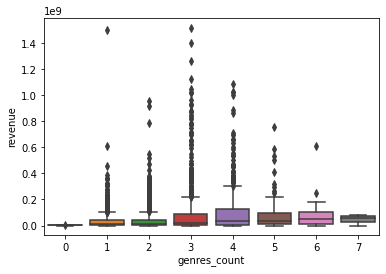

In [37]:
sns.boxplot(x=X["genres_count"],y=X["revenue"])

In [ ]:
X["homepage"].isunique).sum() , X["homepage"].value_counts().sort_values(ascending=False)

In [39]:
homepage_having = X["homepage"].apply(lambda x : 1 if type(x)!=float  else 0)

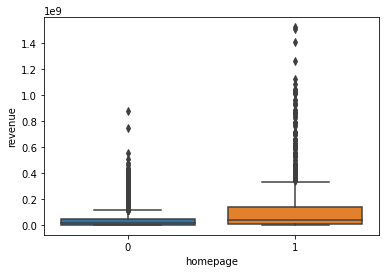

In [40]:
sns.boxplot(x=homepage_having,y=X["revenue"])

In [41]:
X["homepage"] = homepage_having

In [42]:
X.head()

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,status,tagline,title,Keywords,cast,crew,revenue,has_collection,collection_name,genres_count
0,14000000,[Comedy],0,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,Hot Tub Time Machine Collection,1
1,40000000,"[Comedy, Drama, Family, Romance]",0,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,The Princess Diaries Collection,4
2,3300000,[Drama],1,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,-1,1
3,1200000,"[Thriller, Drama]",1,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,-1,2
4,0,"[Action, Thriller]",0,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,-1,2


# imdbid

In [43]:
len(X["imdb_id"].unique())

3000

In [44]:
X.drop(labels=["imdb_id"],axis=1,inplace=True)

# original_language

In [45]:
len(X["original_language"].unique())

36

In [46]:
X["original_language"].isnull().sum()

0

In [47]:
original_languages_total =  Counter([lang for lang in X["original_language"]])
original_languages_count = len(original_languages_total)
original_languages_total.most_common()

[('en', 2575),
 ('fr', 78),
 ('ru', 47),
 ('es', 43),
 ('hi', 42),
 ('ja', 37),
 ('it', 24),
 ('ko', 20),
 ('cn', 20),
 ('zh', 19),
 ('de', 18),
 ('ta', 16),
 ('sv', 8),
 ('nl', 6),
 ('pt', 6),
 ('fa', 5),
 ('da', 5),
 ('ro', 4),
 ('tr', 3),
 ('hu', 3),
 ('te', 2),
 ('fi', 2),
 ('no', 2),
 ('pl', 2),
 ('ml', 2),
 ('sr', 1),
 ('cs', 1),
 ('mr', 1),
 ('el', 1),
 ('ur', 1),
 ('he', 1),
 ('ar', 1),
 ('nb', 1),
 ('vi', 1),
 ('bn', 1),
 ('id', 1)]

In [462]:
original_languages_count

36

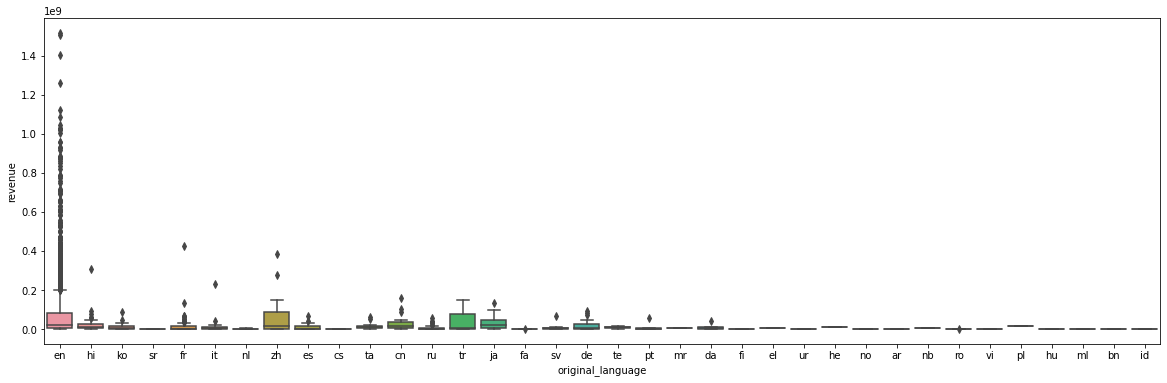

In [48]:
plt.figure(figsize=(20,6))
sns.boxplot(x=X["original_language"],y=X["revenue"])

In [49]:
X["is_english_original_language"]=X["original_language"].apply(lambda x : 1 if x=="en" else 0)

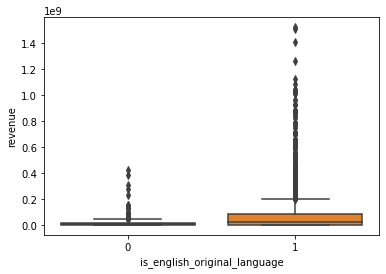

In [51]:
sns.boxplot(X["is_english_original_language"],X["revenue"])

# original_title

In [52]:
len(X["original_title"].unique()),X["original_title"].isnull().sum()

(2975, 0)

In [53]:
X["original_title"].value_counts()

The Double        2
Red Dawn          2
Black Sheep       2
Joshua            2
Fantastic Four    2
                 ..
Mr. Baseball      1
Absolute Power    1
Xanadu            1
Into the Wild     1
Every Day         1
Name: original_title, Length: 2975, dtype: int64

In [54]:
dumy = X.loc[X["original_title"]=="Scarface"]
dumy

,budget,genres,homepage,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,...,tagline,title,Keywords,cast,crew,revenue,has_collection,collection_name,genres_count,is_english_original_language
555,0,"[Action, Adventure, Crime, Drama, Thriller]",0,en,Scarface,"Big Louis Costillo, last of the old-style gang...",4.854436,/ai9WOjgNRXo42D0GJIIdi7toZ5x.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,The rise and fall of a power hungry mobster.,Scarface,"[{'id': 520, 'name': 'chicago'}, {'id': 567, '...","[{'cast_id': 8, 'character': ""Tony 'Scarface' ...","[{'credit_id': '56ec46ae9251414408002d16', 'de...",600000,0,-1,5,1
1452,25000000,"[Action, Crime, Drama, Thriller]",0,en,Scarface,After getting a green card in exchange for ass...,11.299673,/zr2p353wrd6j3wjLgDT4TcaestB.jpg,"[{'name': 'Universal Pictures', 'id': 33}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,The world is yours...,Scarface,"[{'id': 416, 'name': 'miami'}, {'id': 417, 'na...","[{'cast_id': 9, 'character': 'Tony Montana', '...","[{'credit_id': '52fe4219c3a36847f8003e1f', 'de...",65884703,0,-1,4,1


In [56]:
X.drop(labels=["original_title"],axis=1,inplace=True)


# overview


In [57]:
len(X["overview"].unique()),X["overview"].isnull().sum()

(2993, 8)

In [58]:
# X["overview"].value_counts()

In [59]:
X.drop(["overview"],axis=1,inplace=True)

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   budget                        3000 non-null   int64  
 1   genres                        3000 non-null   object 
 2   homepage                      3000 non-null   int64  
 3   original_language             3000 non-null   object 
 4   popularity                    3000 non-null   float64
 5   poster_path                   2999 non-null   object 
 6   production_companies          2844 non-null   object 
 7   production_countries          2945 non-null   object 
 8   release_date                  3000 non-null   object 
 9   runtime                       2998 non-null   float64
 10  spoken_languages              2980 non-null   object 
 11  status                        3000 non-null   object 
 12  tagline                       2403 non-null   object 
 13  tit

# popularity

In [61]:
X["popularity"].isnull().sum()

0

In [62]:
X["popularity"].head()

0     6.575393
1     8.248895
2    64.299990
3     3.174936
4     1.148070
Name: popularity, dtype: float64

In [436]:
X["popularity"].describe()

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

In [435]:
X.loc[X["popularity"]==0]

,budget,genres,homepage,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,...,collection_name,genres_count,is_english_original_language,week-day,year,month,Keywords_count,cast_strength,crew_strength,revenue_log


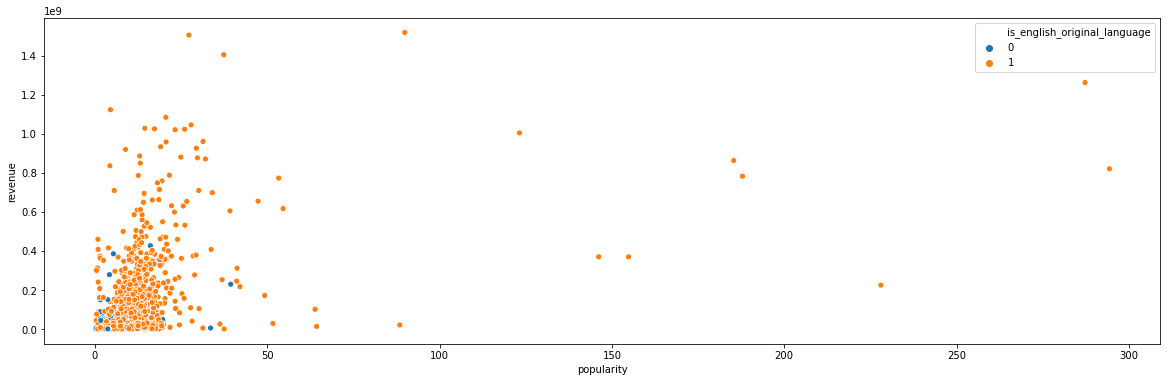

In [64]:
plt.figure(figsize=(20,6))
sns.scatterplot(x=X["popularity"],y=X["revenue"],hue=X["is_english_original_language"])

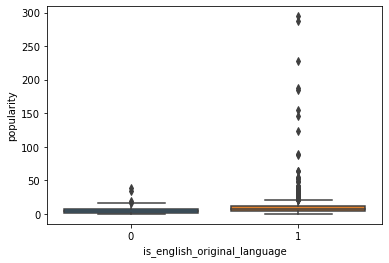

In [65]:
sns.boxplot(X["is_english_original_language"],X["popularity"])
# X.head()

In [66]:
# sns.boxplot(x=X["has_collection"] ,y =X["popularity"])


# posterpath

In [67]:
X["poster_path"].isnull().sum()

1

In [68]:
len(X["poster_path"].unique())

3000

In [69]:
X["poster_path"].head()

0    /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
1    /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg
2    /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg
3    /aTXRaPrWSinhcmCrcfJK17urp3F.jpg
4    /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg
Name: poster_path, dtype: object

In [70]:
X.drop(["poster_path"],axis=1,inplace=True)

# production_companies


In [71]:
X["production_companies"][0]

"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]"

In [72]:
X["production_companies"].isnull().sum()

156

In [73]:
X["production_companies"]= X["production_companies"].apply(lambda x :[ele['name'] for ele in literal_eval(x)] if type(x)!=float else [])

In [74]:
production_companies_total = Counter([comp for row in X["production_companies"] for comp in row])
production_companies_count = len(production_companies_total)
production_companies_count

3695

In [75]:
production_companies_total.most_common(5)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91)]

In [76]:
arr = X["production_companies"].apply(lambda x : len(x))

In [77]:
arr.value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

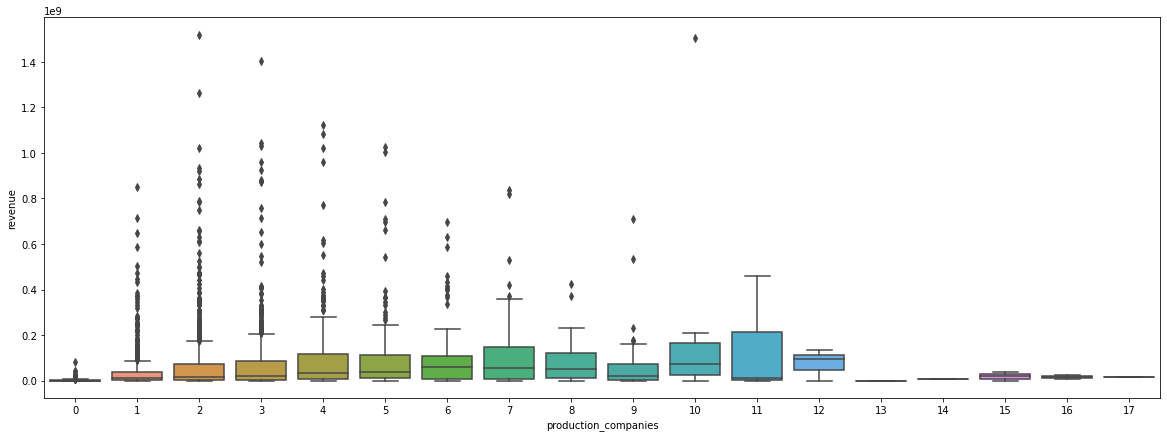

In [78]:
plt.figure(figsize=(20,7))
sns.boxplot(x=arr,y=X["revenue"])

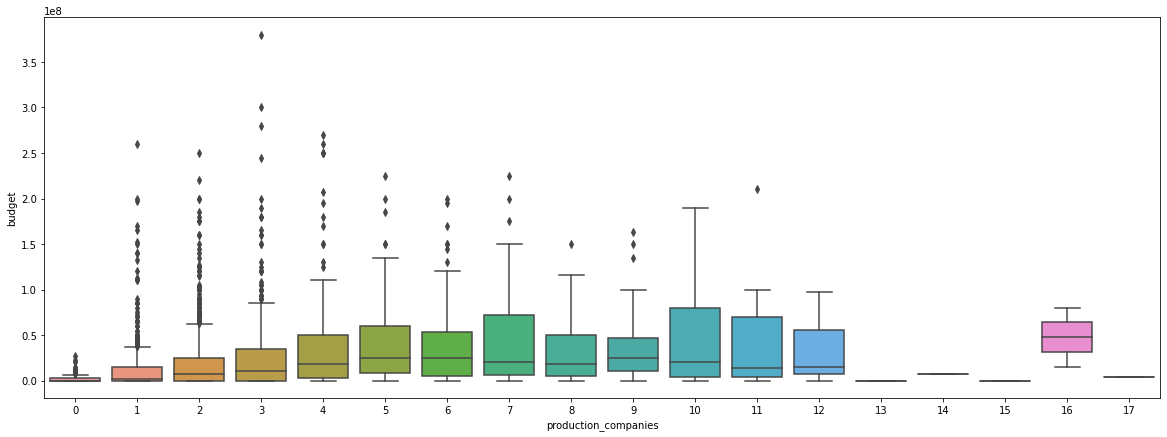

In [79]:
plt.figure(figsize=(20,7))
sns.boxplot(x=arr,y=X["budget"])

# production_country

In [80]:
X["production_countries"].isnull().sum()

55

In [81]:
for ele in range(15):
    print(X["production_countries"][ele])

[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'IN', 'name': 'India'}]
[{'iso_3166_1': 'KR', 'name': 'South Korea'}]
nan
[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'CA', 'name': 'Canada'}]
nan
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]


In [82]:
X["production_countries"] = X["production_countries"].apply(lambda x : [ele['iso_3166_1'] for ele in literal_eval(x)] if type(x)!=float else [])

In [83]:
production_countries_total = Counter([count for row in X["production_countries"] for count in row ])
production_countries_count = len(production_countries_total)
production_countries_count

74

In [84]:
production_countries_total.most_common(5)

[('US', 2282), ('GB', 380), ('FR', 222), ('DE', 167), ('CA', 120)]

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   budget                        3000 non-null   int64  
 1   genres                        3000 non-null   object 
 2   homepage                      3000 non-null   int64  
 3   original_language             3000 non-null   object 
 4   popularity                    3000 non-null   float64
 5   production_companies          3000 non-null   object 
 6   production_countries          3000 non-null   object 
 7   release_date                  3000 non-null   object 
 8   runtime                       2998 non-null   float64
 9   spoken_languages              2980 non-null   object 
 10  status                        3000 non-null   object 
 11  tagline                       2403 non-null   object 
 12  title                         3000 non-null   object 
 13  Key

# release date

In [86]:
X["release_date"] = pd.to_datetime(X["release_date"])

In [87]:
import datetime
def fix_date(x):
    if x.year > 2020:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year,x.month,x.day)
X["release_date"]= X["release_date"].apply(lambda x : fix_date(x))

In [88]:
X["release_date"] =  pd.to_datetime(X["release_date"])

In [89]:
X["week-day"]= X["release_date"].dt.day_name()

In [90]:
X["week-day"]

0         Friday
1         Friday
2         Friday
3         Friday
4       Thursday
          ...   
2995      Friday
2996    Thursday
2997      Friday
2998      Friday
2999    Thursday
Name: week-day, Length: 3000, dtype: object

In [91]:
X["year"]= X["release_date"].dt.year

In [92]:
X["year"]

0       2015
1       2004
2       2014
3       2012
4       2009
        ... 
2995    1994
2996    2013
2997    1996
2998    2004
2999    2011
Name: year, Length: 3000, dtype: int64

In [93]:
X["month"]=X["release_date"].dt.month

In [438]:
day = X["release_date"].dt.day

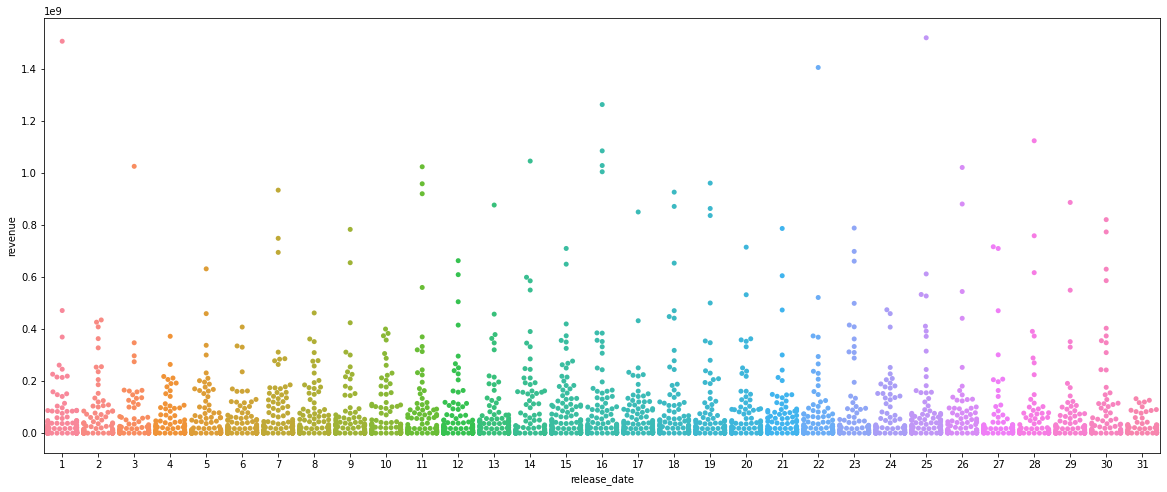

In [440]:
plt.figure(figsize=(20,8))
sns.swarmplot(x=day,y=X["revenue"])

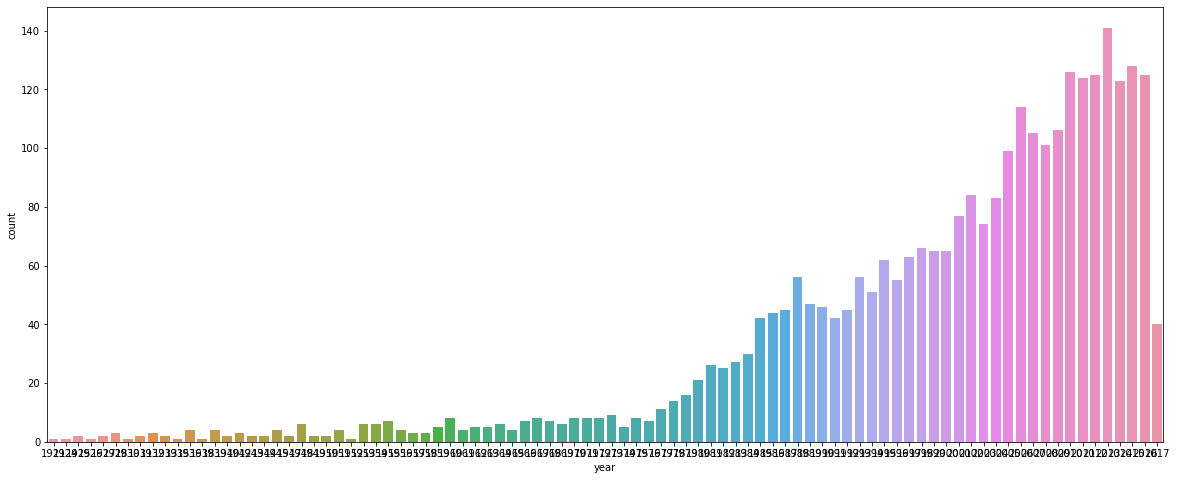

In [95]:
plt.figure(figsize=(20,8))
sns.countplot(x=X["year"])



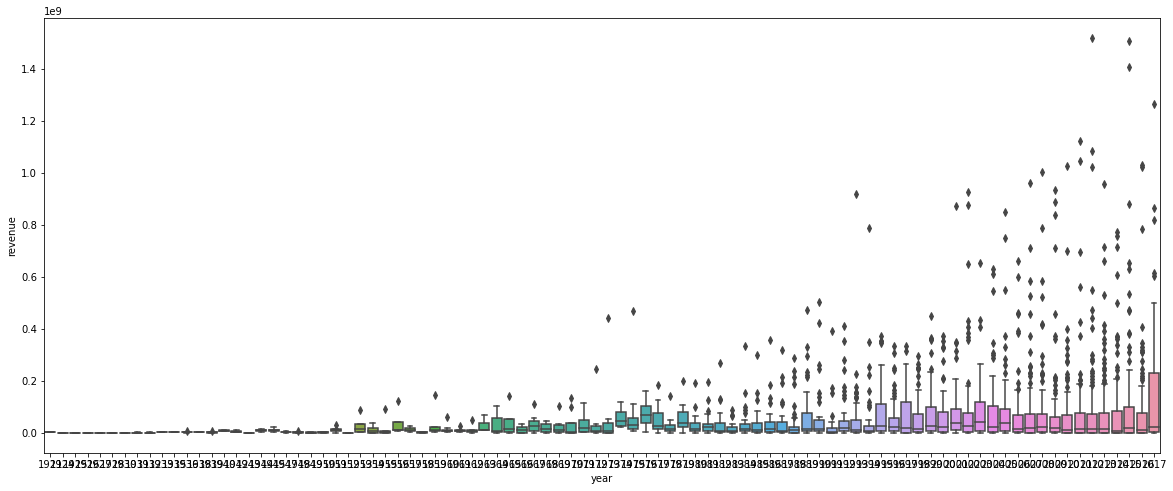

In [460]:
plt.figure(figsize=(20,8))
sns.boxplot(x=X["year"],y=X["revenue"])

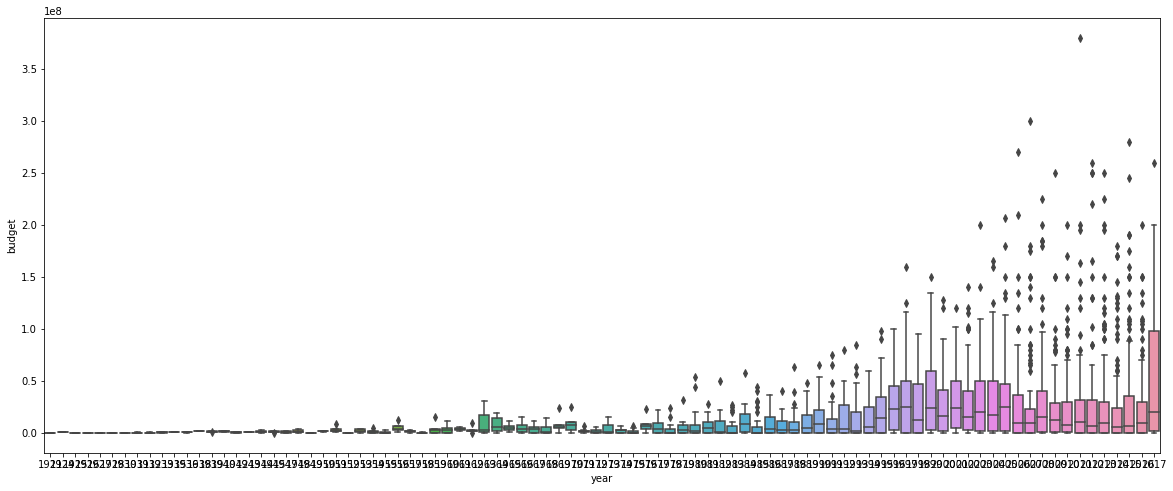

In [275]:
plt.figure(figsize=(20,8))
sns.boxplot(x=X["year"],y=X["budget"])

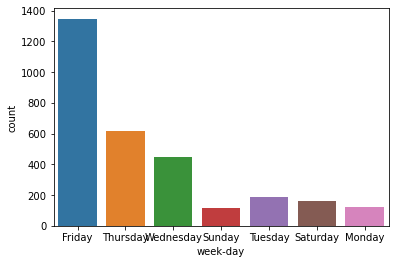

In [96]:
sns.countplot(x=X["week-day"])

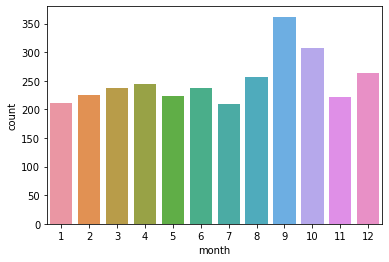

In [97]:
sns.countplot(x=X["month"])

In [98]:
X.columns

Index(['budget', 'genres', 'homepage', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue', 'has_collection', 'collection_name',
       'genres_count', 'is_english_original_language', 'week-day', 'year',
       'month'],
      dtype='object')

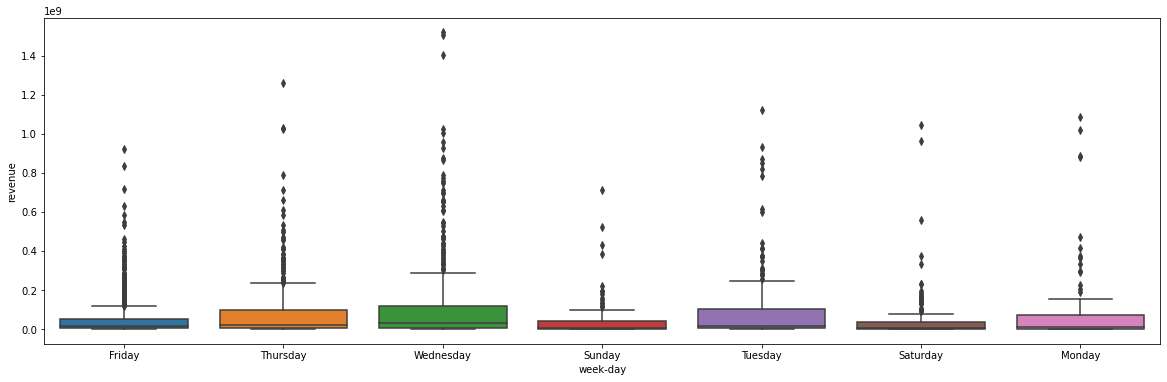

In [99]:
plt.figure(figsize=(20,6))
sns.boxplot(x="week-day",y="revenue",data=X)

# runtime

In [100]:
X["runtime"].isnull().sum()

2

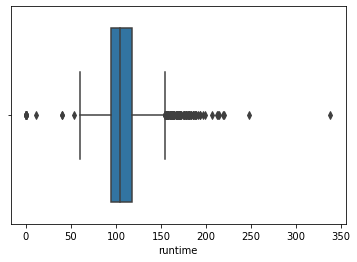

In [101]:
sns.boxplot(X["runtime"])


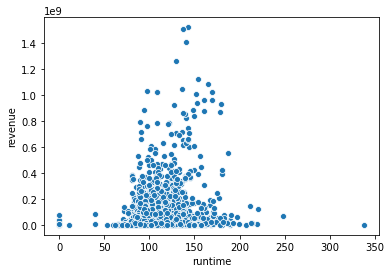

In [461]:
sns.scatterplot(X["runtime"],X["revenue"])

In [102]:
X["runtime"].sum()/(len(X["runtime"])-2)

107.85657104736491

In [103]:
mean_value = X["runtime"].mean()
X["runtime"].fillna(mean_value,inplace=True)

In [104]:
X['runtime'].isnull().sum()

0

# spoken languages

In [105]:
X["spoken_languages"].isnull().sum()

20

In [106]:
for i in range(15):
    print(X['spoken_languages'][0])

[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]


In [107]:
X["spoken_languages"].apply(lambda x : len(literal_eval(x)) if type(x)!=float else 0).max()

9

In [108]:
X["spoken_languages"] =  X["spoken_languages"].apply(lambda x : [ele['iso_639_1'] for ele in literal_eval(x)] if type(x)!=float else [])

In [109]:
spoken_languages_total = Counter([lang for row in X["spoken_languages"] for lang in row])
spoken_languages_count = len(spoken_languages_total)
spoken_languages_count

79

In [110]:
spoken_languages_total.most_common(10)

[('en', 2618),
 ('fr', 288),
 ('es', 239),
 ('de', 169),
 ('ru', 152),
 ('it', 124),
 ('ja', 89),
 ('zh', 68),
 ('hi', 56),
 ('pt', 43)]

In [111]:
lang_len = X["spoken_languages"].apply(lambda x : len(x))

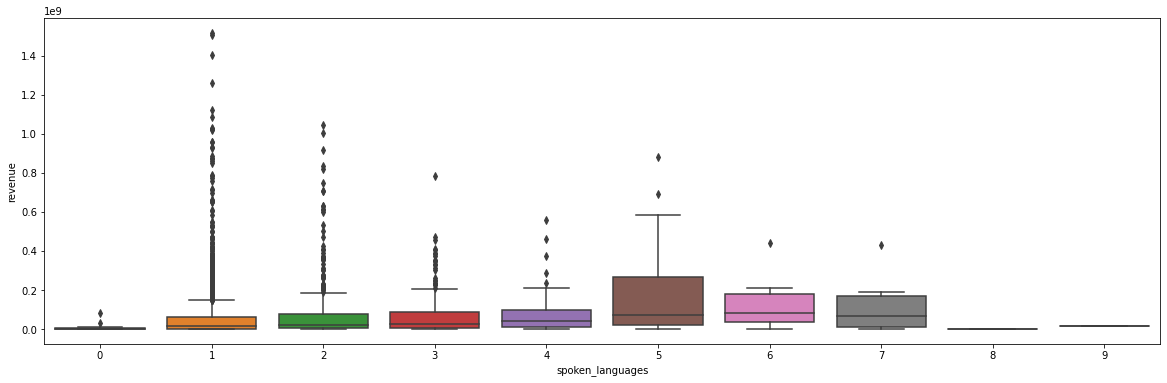

In [115]:
plt.figure(figsize=(20,6))
sns.boxplot(x=lang_len,y=X["revenue"])

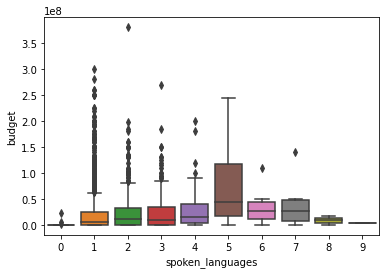

In [116]:
sns.boxplot(x=lang_len,y=X["budget"])

# status 


In [117]:
X["status"].isnull().sum()

0

In [118]:
X["status"].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [119]:
status_study = X[['status','revenue']]

In [120]:
df = status_study.groupby(by="status",as_index=False)
df.agg({'revenue' : ['min', 'max', 'mean', 'count']})

status revenue                                
                min         max          mean count
0  Released       1  1519557910  6.681029e+07  2996
1   Rumored      60    13418091  3.480199e+06     4

In [121]:
X.drop(["status"],axis=1,inplace=True)

# tagline

In [122]:
X["tagline"].isnull().sum()

597

In [123]:
X["tagline"][0]

'The Laws of Space and Time are About to be Violated.'

In [96]:
len(X["tagline"].value_counts())

2400

In [97]:
X.drop(["tagline"],axis=1,inplace=True)

# title

In [124]:
X["title"].isnull().sum()

0

In [125]:
X["title"].value_counts()

Hot Pursuit             2
The Three Musketeers    2
The Women               2
The Other Woman         2
Loose Cannons           2
                       ..
Mr. Baseball            1
Absolute Power          1
Xanadu                  1
Into the Wild           1
Every Day               1
Name: title, Length: 2969, dtype: int64

In [126]:
len(X["title"].unique())

2969

In [127]:
X.drop(["title"],axis=1,inplace=True)

In [128]:
# keywords

In [129]:
X["Keywords"].isnull().sum()

276

In [130]:
X["Keywords"][0]

"[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]"

In [131]:
X["Keywords"]=X["Keywords"].apply(lambda x : [ele["name"] for ele in literal_eval(x)] if type(x)!=float else [] )

In [132]:
keywords_total = Counter([key for row in X["Keywords"] for key in row])
keywords_count= len(keywords_total)
keywords_count

7400

In [133]:
keywords_total.most_common(5)

[('woman director', 175),
 ('independent film', 155),
 ('duringcreditsstinger', 134),
 ('murder', 123),
 ('based on novel', 111)]

In [134]:
X["Keywords_count"] = X["Keywords"].apply(lambda x : len(x))

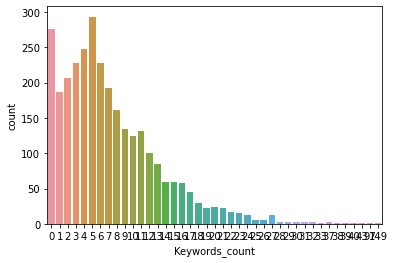

In [135]:
sns.countplot(X["Keywords_count"])

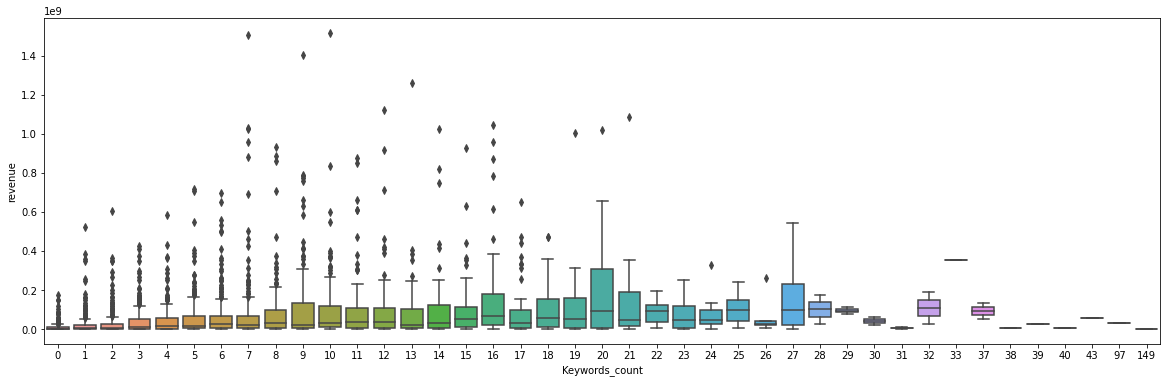

In [138]:

plt.figure(figsize=(20,6))
sns.boxplot(X["Keywords_count"],X["revenue"])

In [139]:
X.drop(["Keywords"],axis=1,inplace=True)

In [140]:
X["Keywords_count"].describe()

count    3000.000000
mean        7.226667
std         6.665891
min         0.000000
25%         3.000000
50%         6.000000
75%        10.000000
max       149.000000
Name: Keywords_count, dtype: float64

In [141]:
X.columns

Index(['budget', 'genres', 'homepage', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'tagline', 'cast', 'crew', 'revenue',
       'has_collection', 'collection_name', 'genres_count',
       'is_english_original_language', 'week-day', 'year', 'month',
       'Keywords_count'],
      dtype='object')

# cast

In [142]:
X["cast"].isnull().sum()

13

In [143]:
len(literal_eval(X["cast"][0]))

24

In [144]:
X["cast_strength"] = X["cast"].apply(lambda x : len(literal_eval(x)) if type(x)!=float else 0)

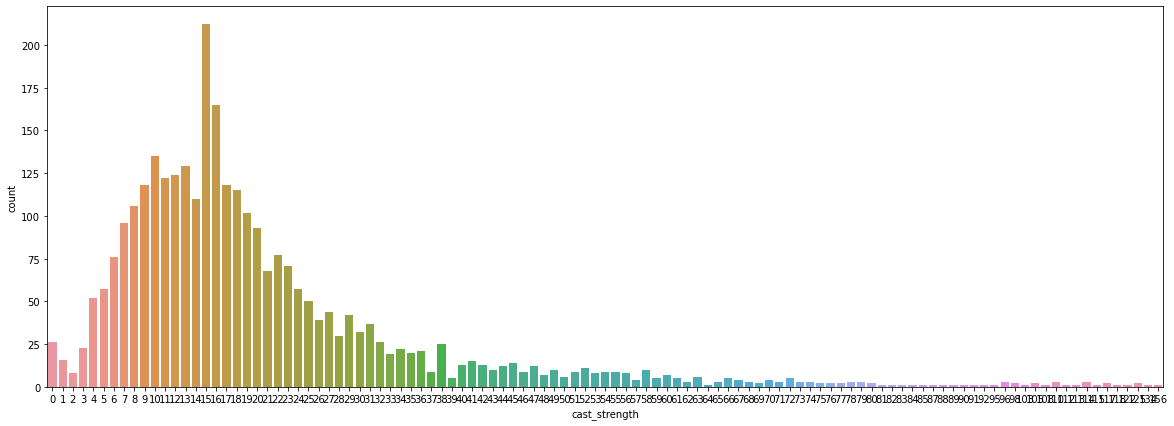

In [145]:
plt.figure(figsize=(20,7))
sns.countplot(X["cast_strength"])

In [146]:
X["cast_strength"].describe()

count    3000.000000
mean       20.603667
std        16.629635
min         0.000000
25%        11.000000
50%        16.000000
75%        24.000000
max       156.000000
Name: cast_strength, dtype: float64

In [147]:
X.drop(["cast"],axis=1,inplace=True)

In [150]:
X["cast_strength"].median()

16.0

In [152]:
X['cast_strength']=X["cast_strength"].replace(0,X["cast_strength"].median())

In [153]:
X['cast_strength'].describe()

count    3000.000000
mean       20.742333
std        16.523588
min         1.000000
25%        11.000000
50%        16.000000
75%        24.000000
max       156.000000
Name: cast_strength, dtype: float64

**crew 

In [154]:
X["crew"].isnull().sum()

16

In [155]:
len(literal_eval(X["crew"][0]))

72

In [156]:
X["crew_strength"] = X["crew"].apply(lambda x : len(literal_eval(x)) if type(x)!=float else 0)

In [157]:
X["crew_strength"].describe()

count    3000.000000
mean       24.365667
std        28.066419
min         0.000000
25%         8.000000
50%        14.000000
75%        28.000000
max       194.000000
Name: crew_strength, dtype: float64

In [158]:
X.drop(["crew"],axis=1,inplace=True)

In [159]:
X.shape

(3000, 22)

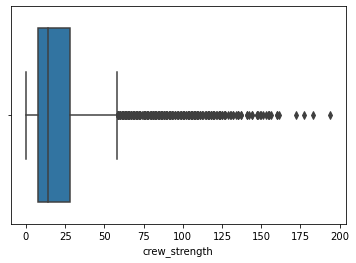

In [160]:
sns.boxplot(X["crew_strength"])

In [164]:
X["crew_strength"]=X['crew_strength'].replace(0,X["crew_strength"].median())

In [165]:
X.columns

Index(['budget', 'genres', 'homepage', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'tagline', 'revenue', 'has_collection',
       'collection_name', 'genres_count', 'is_english_original_language',
       'week-day', 'year', 'month', 'Keywords_count', 'cast_strength',
       'crew_strength'],
      dtype='object')

In [166]:
X.head()

,budget,genres,homepage,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,...,has_collection,collection_name,genres_count,is_english_original_language,week-day,year,month,Keywords_count,cast_strength,crew_strength
0,14000000,[Comedy],0,en,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[US],2015-02-20,93.0,[en],...,1,Hot Tub Time Machine Collection,1,1,Friday,2015,2,4,24,72
1,40000000,"[Comedy, Drama, Family, Romance]",0,en,8.248895,[Walt Disney Pictures],[US],2004-08-06,113.0,[en],...,1,The Princess Diaries Collection,4,1,Friday,2004,8,4,20,9
2,3300000,[Drama],1,en,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[US],2014-10-10,105.0,[en],...,0,-1,1,1,Friday,2014,10,12,51,64
3,1200000,"[Thriller, Drama]",1,hi,3.174936,[],[IN],2012-03-09,122.0,"[en, hi]",...,0,-1,2,0,Friday,2012,3,7,7,3
4,0,"[Action, Thriller]",0,ko,1.148070,[],[KR],2009-02-05,118.0,[ko],...,0,-1,2,0,Thursday,2009,2,0,4,2


In [126]:
X.corr()

,budget,homepage,popularity,runtime,revenue,has_collection,genres_count,year,month,Keywords_count,cast_strength,crew_strength
budget,1.000000,0.247627,0.342356,0.238350,0.752965,0.222932,0.234188,0.213915,0.031094,0.155771,0.308950,0.436459
homepage,0.247627,1.000000,0.164797,0.041066,0.263179,0.060001,0.006122,0.381495,-0.015673,0.108454,0.140999,0.176679
popularity,0.342356,0.164797,1.000000,0.133669,0.461460,0.155896,0.084100,0.109711,-0.010692,0.167899,0.312118,0.310636
runtime,0.238350,0.041066,0.133669,1.000000,0.216363,-0.036916,0.057920,-0.028940,0.130190,0.114760,0.223345,0.153068
revenue,0.752965,0.263179,0.461460,0.216363,1.000000,0.339425,0.163654,0.137933,0.020164,0.187721,0.335737,0.372110
has_collection,0.222932,0.060001,0.155896,-0.036916,0.339425,1.000000,0.101065,-0.041488,-0.048361,0.098669,0.098710,0.101876
genres_count,0.234188,0.006122,0.084100,0.057920,0.163654,0.101065,1.000000,-0.052651,-0.011342,0.092811,0.068102,0.128211
year,0.213915,0.381495,0.109711,-0.028940,0.137933,-0.041488,-0.052651,1.000000,-0.068563,-0.105968,0.024121,0.145307
month,0.031094,-0.015673,-0.010692,0.130190,0.020164,-0.048361,-0.011342,-0.068563,1.000000,-0.003158,0.020150,0.018036
Keywords_count,0.155771,0.108454,0.167899,0.114760,0.187721,0.098669,0.092811,-0.105968,-0.003158,1.000000,0.187435,0.238346


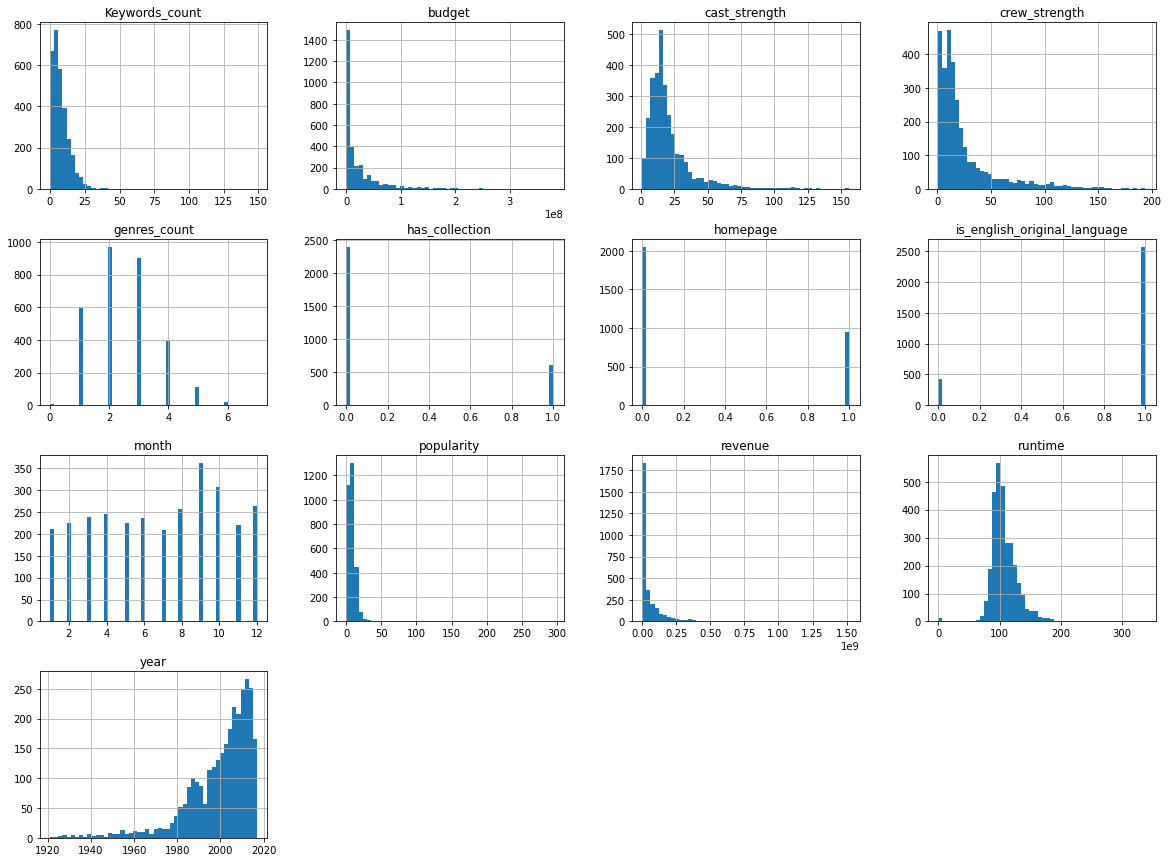

In [167]:
X.hist(bins=50, figsize=(20, 15))
plt.show()

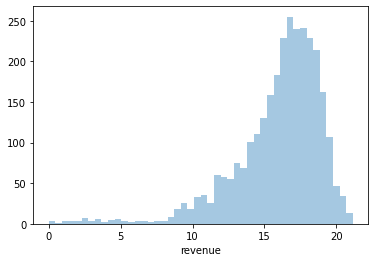

In [448]:
sns.distplot(np.log(X["revenue"]),kde=False)

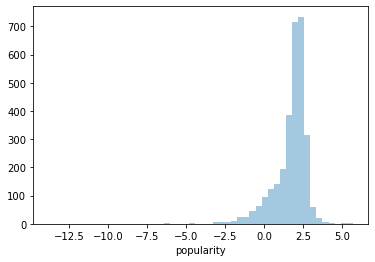

In [450]:
sns.distplot(np.log(X["popularity"]),kde=False)

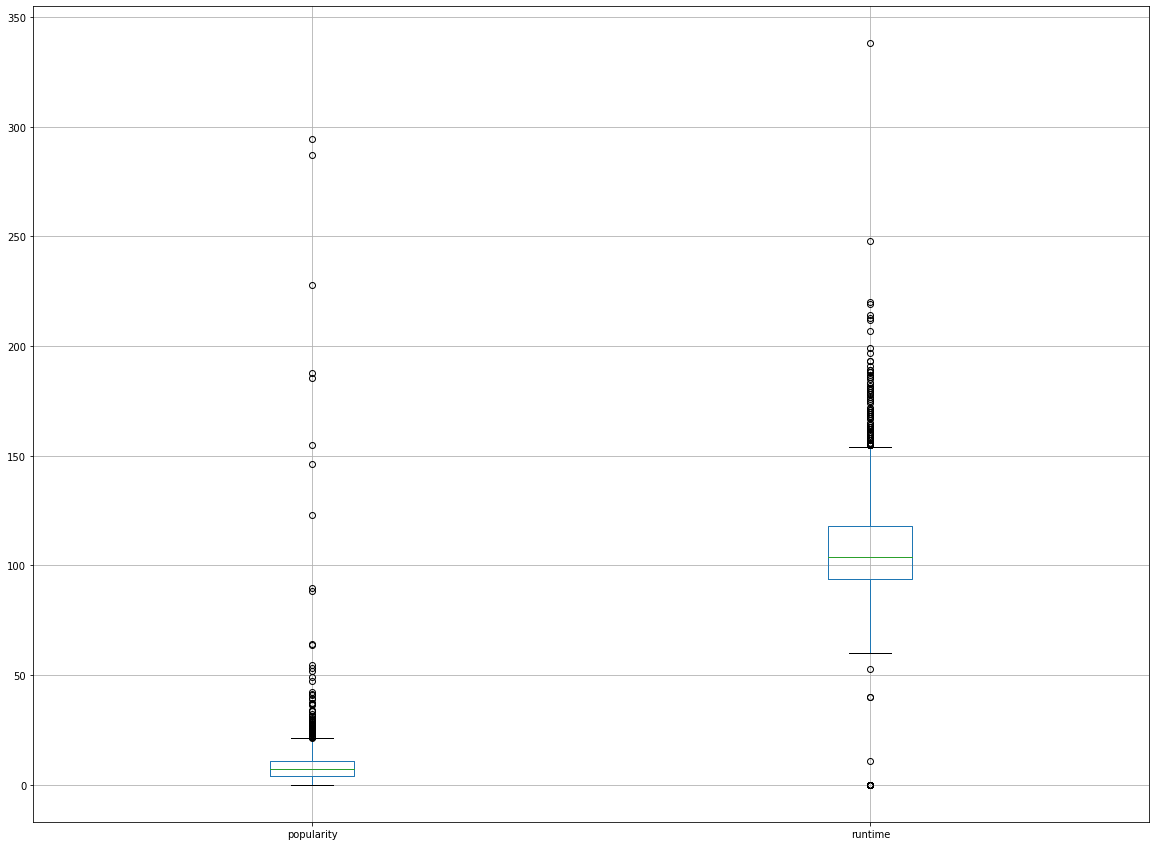

In [340]:
X.boxplot( column=["popularity","runtime"],figsize=(20, 15))
plt.show()

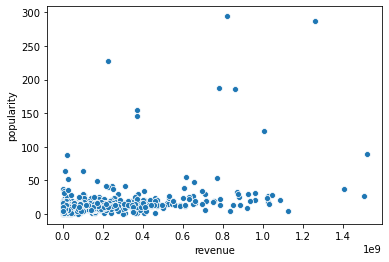

In [343]:
sns.scatterplot(X["revenue"],X["popularity"])

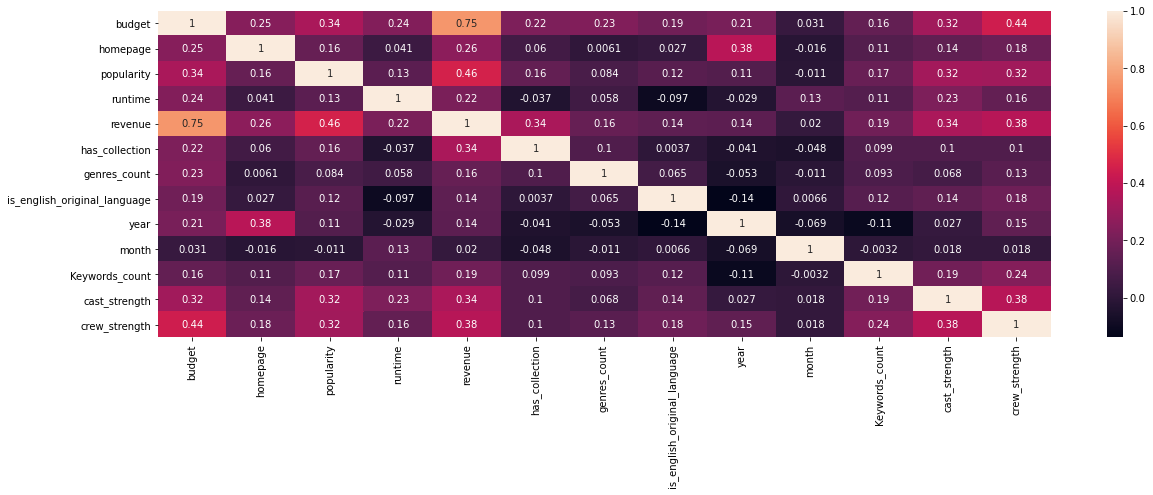

In [168]:
plt.figure(figsize=(20,6))
sns.heatmap(X.corr(),annot=True)

In [317]:
#budget
df_with_budget = X[X["budget"]!=0]

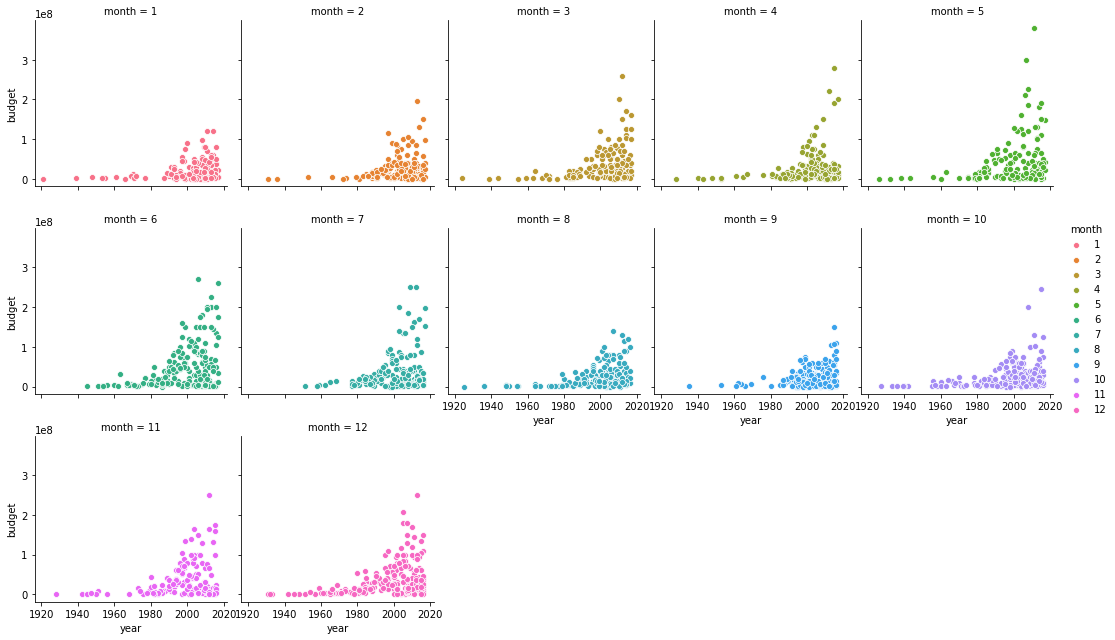

In [324]:
grid = sns.FacetGrid(df_with_budget, col = "month", hue = "month", col_wrap=5)
grid.map(sns.scatterplot, "year", "budget")

grid.add_legend()

In [ ]:
grid = sns.FacetGrid(df_with_budget, col = "month", hue = "month", col_wrap=5)
grid.map(sns.scatterplot, "year", "revenue")

grid.add_legend()

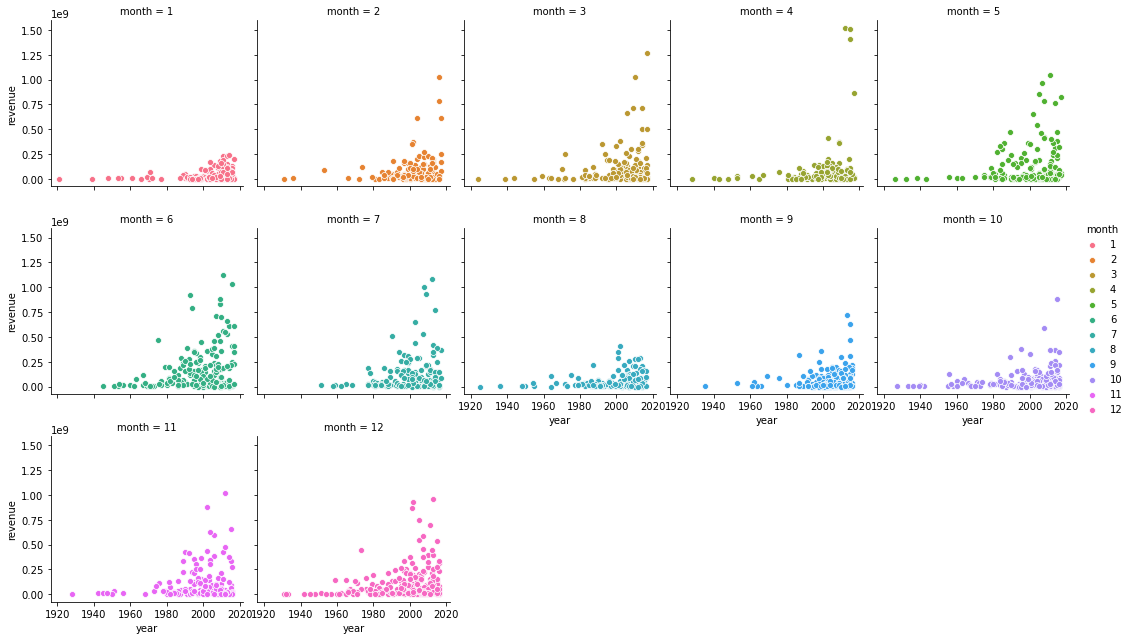

In [325]:
grid = sns.FacetGrid(df_with_budget, col = "month", hue = "month", col_wrap=5)
grid.map(sns.scatterplot, "year", "revenue")

grid.add_legend()

C:\Users\piyushgupta04\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


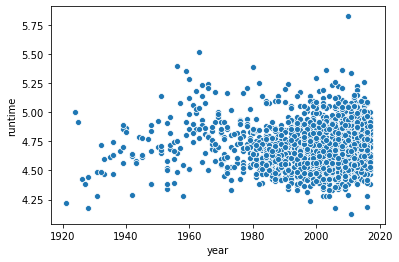

In [451]:
sns.scatterplot(df_with_budget["year"],np.log(df_with_budget["runtime"]))

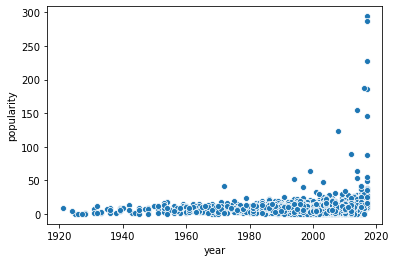

In [327]:
sns.scatterplot(df_with_budget["year"],df_with_budget["popularity"])

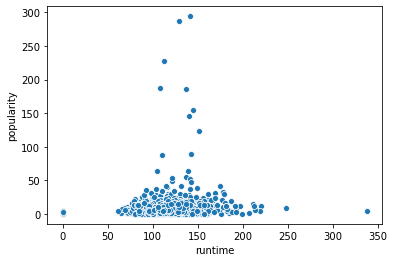

In [328]:
sns.scatterplot(df_with_budget["runtime"],df_with_budget["popularity"])

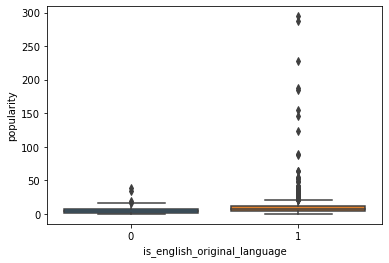

In [330]:
sns.boxplot(X["is_english_original_language"],y=X["popularity"])

In [344]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5, add_indicator=True)

In [386]:
X["budget"].describe()

count    3.000000e+03
mean     2.253133e+07
std      3.702609e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [403]:
cp = X.copy()
cl= [ele for ele in cp.columns if cp[ele].dtypes != 'O']

In [404]:
cl.remove("release_date")
cl.remove("revenue")
cl.remove("revenue_log")

In [405]:
cl

['budget',
 'homepage',
 'popularity',
 'runtime',
 'has_collection',
 'genres_count',
 'is_english_original_language',
 'year',
 'month',
 'Keywords_count',
 'cast_strength',
 'crew_strength']

In [406]:
cp["budget"]=cp["budget"].replace(0,np.nan)

In [407]:
cp.isna().sum()

budget                          812
genres                            0
homepage                          0
original_language                 0
popularity                        0
production_companies              0
production_countries              0
release_date                      0
runtime                           0
spoken_languages                  0
tagline                         597
revenue                           0
has_collection                    0
collection_name                   0
genres_count                      0
is_english_original_language      0
week-day                          0
year                              0
month                             0
Keywords_count                    0
cast_strength                     0
crew_strength                     0
revenue_log                       0
dtype: int64

In [408]:
knn.fit(cp[cl])

KNNImputer(add_indicator=True)

In [417]:
len(cl)

12

In [431]:
dfm,cp[cl]

(               0    1          2      3    4    5    6       7     8     9  \
 0     14000000.0  0.0   6.575393   93.0  1.0  1.0  1.0  2015.0   2.0   4.0   
 1     40000000.0  0.0   8.248895  113.0  1.0  4.0  1.0  2004.0   8.0   4.0   
 2      3300000.0  1.0  64.299990  105.0  0.0  1.0  1.0  2014.0  10.0  12.0   
 3      1200000.0  1.0   3.174936  122.0  0.0  2.0  0.0  2012.0   3.0   7.0   
 4      9600000.0  0.0   1.148070  118.0  0.0  2.0  0.0  2009.0   2.0   0.0   
 ...          ...  ...        ...    ...  ...  ...  ...     ...   ...   ...   
 2994  19157600.0  0.0   7.438381  106.0  0.0  1.0  1.0  1992.0   9.0   2.0   
 2995  30300000.0  0.0   9.853270  102.0  0.0  2.0  1.0  1994.0   4.0  19.0   
 2996  12575875.0  0.0   3.727996  102.0  0.0  2.0  0.0  2013.0   3.0   6.0   
 2997  65000000.0  0.0  14.482345  120.0  0.0  4.0  1.0  1996.0  10.0  14.0   
 2998  42000000.0  1.0  15.725542   90.0  0.0  2.0  1.0  2004.0   1.0  22.0   
 
         10    11   12  
 0     24.0  72.0  0.0  


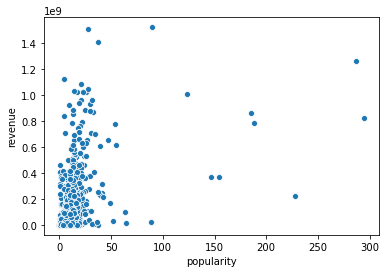

In [432]:
sns.scatterplot(x=X["popularity"],y=X["revenue"])

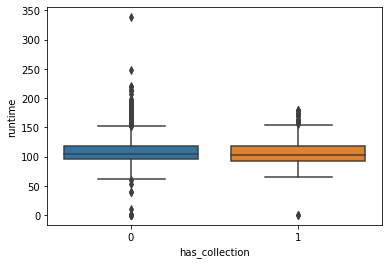

In [336]:
sns.boxplot(X["has_collection"],y=X["runtime"])

In [277]:
df = X.copy()

In [278]:
# df.head()

In [279]:
def top_categories(df,counter_columns,col):
    col_list=[]
    
    if len(counter_columns) > 5:
        for i in range(5):
            col_list.append(col+"_"+counter_columns[i][0])
            
        
    else:
        for ele in counter_columns:
            col_list.append(col+"_" +ele)
            
    i=0
    for val in col_list:
        df[val]=0
        df[val]=df[col].apply(lambda x: 1 if counter_columns[i][0] in x else 0)
        i=i+1
    if len(counter_columns) > 5:
        
        df[col+"_others"]= df[col+"_"+counter_columns[0][0]]|df[col+"_"+counter_columns[1][0]] | df[col+"_"+counter_columns[2][0]] | df[col+"_"+counter_columns[3][0]] | df[col+"_"+counter_columns[4][0]]
        
        df[col+"_others"]= df[col+"_others"].apply(lambda x : 1 if x==0 else 0)
top_categories(df,all_generes_values,"genres")

In [280]:
text="hello_kl"
text.split("_")[-1]

'kl'

In [442]:
log = np.log1p(X["revenue"])

In [444]:
ant = np.expm1(log)

In [446]:
ant,X['revenue']

(0        12314651.0
 1        95149435.0
 2        13092000.0
 3        16000000.0
 4         3923970.0
            ...     
 2995      1596687.0
 2996       180590.0
 2997     89456761.0
 2998    171963386.0
 2999     82087155.0
 Name: revenue, Length: 3000, dtype: float64,
 0        12314651
 1        95149435
 2        13092000
 3        16000000
 4         3923970
           ...    
 2995      1596687
 2996       180590
 2997     89456761
 2998    171963386
 2999     82087155
 Name: revenue, Length: 3000, dtype: int64)

In [299]:
df.columns

Index(['budget', 'homepage', 'popularity', 'release_date', 'runtime',
       'tagline', 'revenue', 'has_collection', 'genres_count',
       'is_english_original_language', 'week-day', 'year', 'month',
       'Keywords_count', 'cast_strength', 'crew_strength', 'genres_Drama',
       'genres_Comedy', 'genres_Thriller', 'genres_Action', 'genres_Romance',
       'genres_others', 'production_countries_US', 'production_countries_GB',
       'production_countries_FR', 'production_countries_DE',
       'production_countries_CA', 'production_countries_others',
       'production_companies_Warner Bros.',
       'production_companies_Universal Pictures',
       'production_companies_Paramount Pictures',
       'production_companies_Twentieth Century Fox Film Corporation',
       'production_companies_Columbia Pictures', 'production_companies_others',
       'spoken_languages_en', 'spoken_languages_fr', 'spoken_languages_es',
       'spoken_languages_de', 'spoken_languages_ru',
       'spoken_lang

In [289]:
# production_countries_total.most_common()

In [290]:
top_categories(df,production_countries_total.most_common(),'production_countries')

In [293]:
top_categories(df,production_companies_total.most_common(),'production_companies')

In [294]:
top_categories(df,spoken_languages_total.most_common(),'spoken_languages')

In [296]:
df.drop(columns=["original_language","production_countries","production_companies","collection_name","spoken_languages","genres"],inplace=True)

In [298]:
df.columns

Index(['budget', 'homepage', 'popularity', 'release_date', 'runtime',
       'tagline', 'revenue', 'has_collection', 'genres_count',
       'is_english_original_language', 'week-day', 'year', 'month',
       'Keywords_count', 'cast_strength', 'crew_strength', 'genres_Drama',
       'genres_Comedy', 'genres_Thriller', 'genres_Action', 'genres_Romance',
       'genres_others', 'production_countries_US', 'production_countries_GB',
       'production_countries_FR', 'production_countries_DE',
       'production_countries_CA', 'production_countries_others',
       'production_companies_Warner Bros.',
       'production_companies_Universal Pictures',
       'production_companies_Paramount Pictures',
       'production_companies_Twentieth Century Fox Film Corporation',
       'production_companies_Columbia Pictures', 'production_companies_others',
       'spoken_languages_en', 'spoken_languages_fr', 'spoken_languages_es',
       'spoken_languages_de', 'spoken_languages_ru',
       'spoken_lang

In [218]:
X_budget = X.loc[X['budget']!=0]

In [214]:
df["genres_others"][0]==1

True

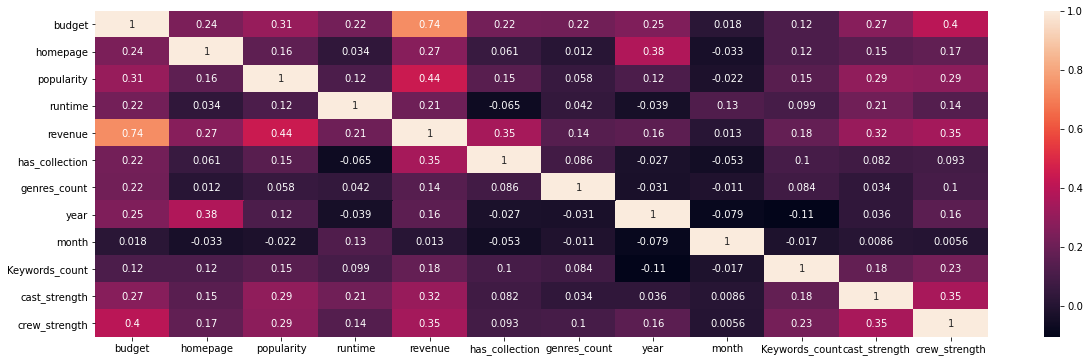

In [130]:
plt.figure(figsize=(20,6))
sns.heatmap(X_budget.corr(),annot=True)

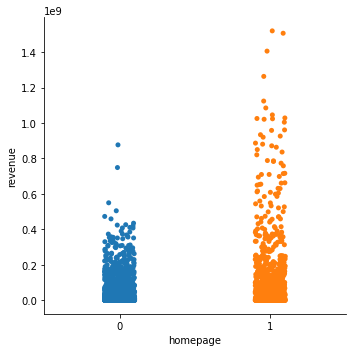

In [300]:
sns.catplot(x='homepage', y='revenue', data=X)

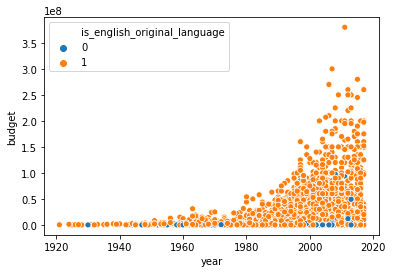

In [316]:
# sns.scatterplot(x=df["year"],y=X["budget"])

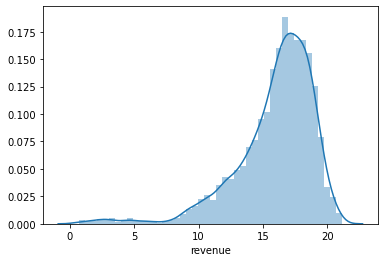

In [301]:
sns.distplot(np.log1p(X['revenue']))

In [302]:
X["revenue_log"] = np.log(X["revenue"])

In [307]:
df.drop(columns=["tagline"],inplace=True)

In [308]:
X["revenue_log"]

0       16.326300
1       18.370959
2       16.387512
3       16.588099
4       15.182614
          ...    
2995    14.283441
2996    12.103985
2997    18.309266
2998    18.962792
2999    18.223292
Name: revenue_log, Length: 3000, dtype: float64

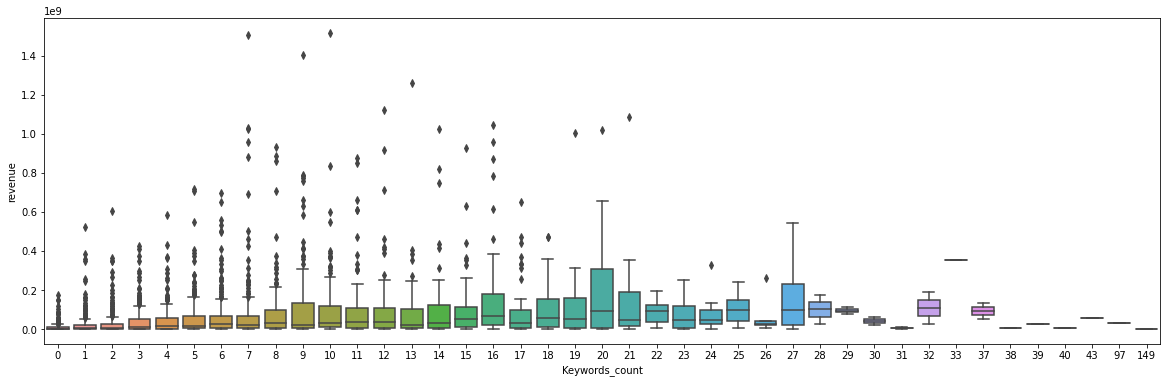

In [453]:
plt.figure(figsize=(20,6))
sns.boxplot(x=df["Keywords_count"],y=df["revenue"])

In [136]:
columns = X.columns.to_list()
columns

['budget',
 'genres',
 'homepage',
 'original_language',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'runtime',
 'spoken_languages',
 'revenue',
 'has_collection',
 'collection_name',
 'genres_count',
 'week-day',
 'year',
 'month',
 'Keywords_count',
 'cast_strength',
 'crew_strength',
 'revenue_log']

In [137]:
X.columns

Index(['budget', 'genres', 'homepage', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'revenue', 'has_collection',
       'collection_name', 'genres_count', 'week-day', 'year', 'month',
       'Keywords_count', 'cast_strength', 'crew_strength', 'revenue_log'],
      dtype='object')

In [236]:
df = X[['budget','homepage','popularity','runtime','month','year','week-day','has_collection','cast_strength','crew_strength','revenue']]

In [237]:
# for col in df.columns:
#     sns.distplot(df[col])
#     plt.show()

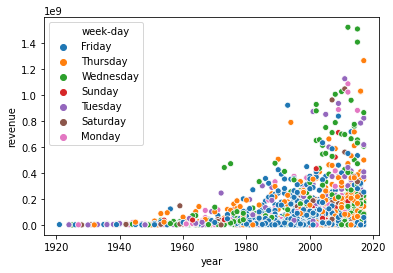

In [238]:
sns.scatterplot(x=df["year"],y=df["revenue"],hue=df["week-day"])

# final analysis of the production company,production country,genres,spoken languages,keywords

In [683]:
def fig_plot(df,col_list,col,n):
    if n > len(col_list):
        n=len(col_list)
    
    f, axes = plt.subplots(n, 1,sharex="all",figsize=(20,20),gridspec_kw={"hspace":0})
    col_list=col_list[:n]
    i=0
    for ele in col_list:
        bx=sns.boxplot(y=col+"_"+ele[0],x="revenue" ,orient="h",data=df[df[col+"_"+ele[0]]==1], palette="Set3",ax=axes[i])       
        bx.set_ylabel(ele[0],rotation=45)
        med=df[df[col+"_"+ele[0]]==1]["revenue"].median()
        mean=df[df[col+"_"+ele[0]]==1]["revenue"].mean()

#         bx.set_yticklabels(bx.get_xticklabels(),rotation=40)
        for xtick in box_plot.get_xticks():
            value_str=str(ele[1])+" ("+ str(round((ele[1]/df.shape[0])*100,2))+")"
            bx.text(1.4*1e9,xtick,value_str,horizontalalignment='center',size='large',color='r',weight='bold')
            bx.text(1.1*1e9,xtick,med,horizontalalignment='center',size='large',color='g',weight='bold')
            bx.text(0.7*1e9,xtick,mean,horizontalalignment='center',size='large',color='b',weight='bold')

        i=i+1


In [635]:
def plot_comparison_by_col(df,col_list,col,n):
    mp = top_category(x,col_list,col)
#     print(mp.columns)
    fig_plot(mp,col_list,col,n)

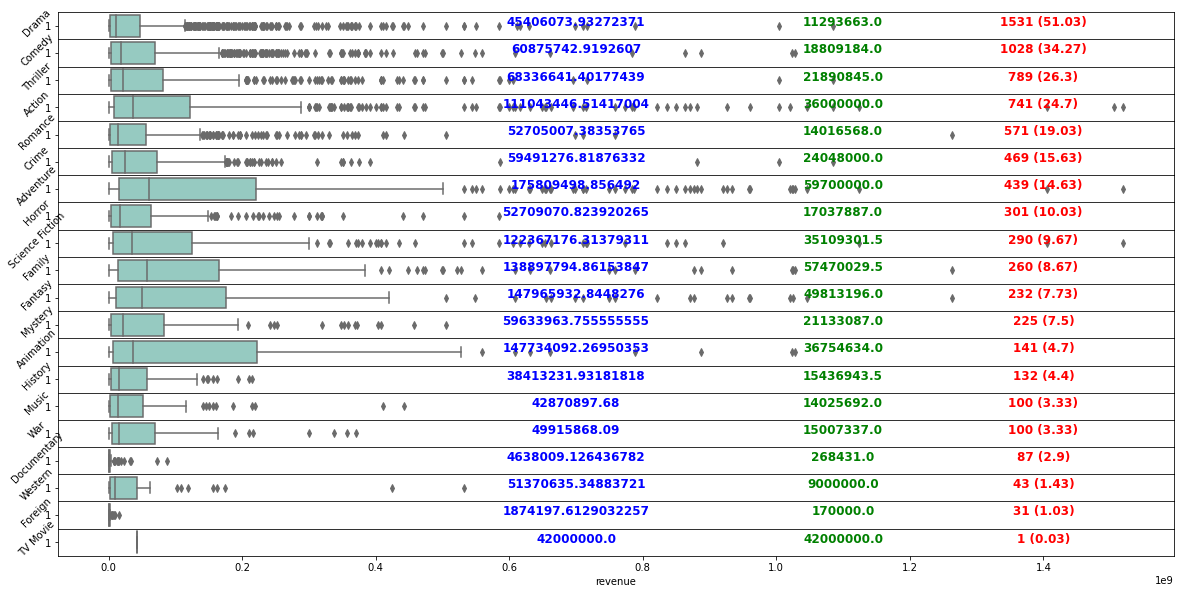

In [636]:
plot_comparison_by_col(x,result_dict["genres"],"genres",20)

In [658]:
val = get_median(x,"genres","Thriller")
list_of_items(x,result_dict["genres"],"genres",20,val)

['Thriller',
 'Action',
 'Crime',
 'Adventure',
 'Science Fiction',
 'Family',
 'Fantasy',
 'Animation',
 'TV Movie']

In [ ]:
list_generes = {"top_revenue":['Adventure', 'Family'],"medium_revenue":['Thriller','Action','Crime', 'Science Fiction','Fantasy','Animation']}

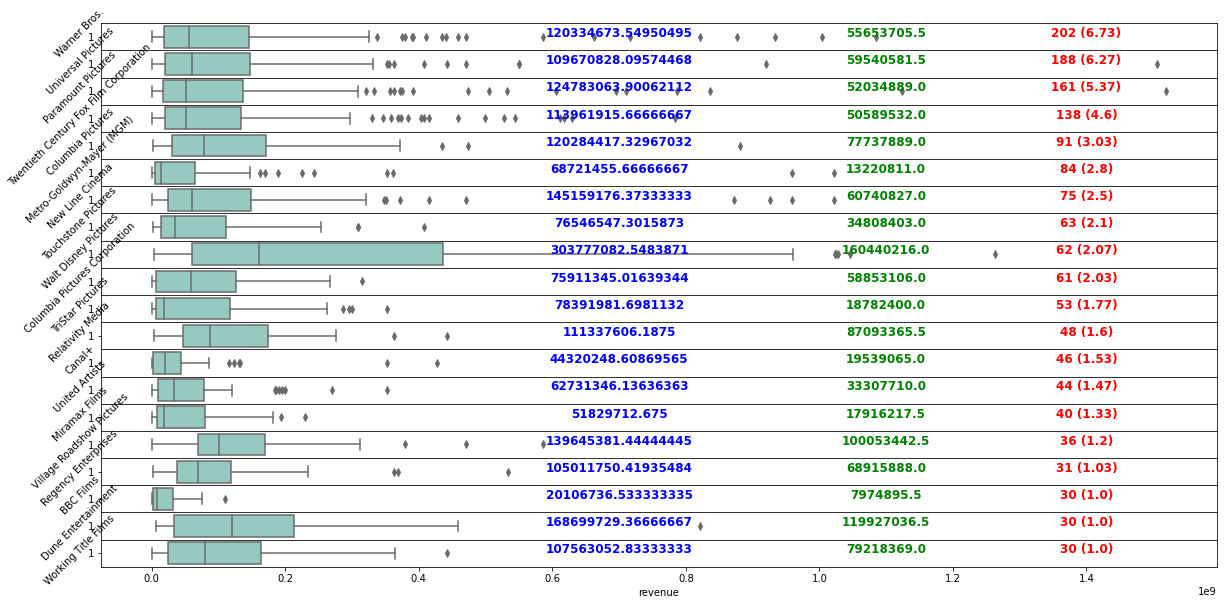

In [666]:
plot_comparison_by_col(x,result_dict["production_companies"],"production_companies",20)

In [682]:
val = get_median(x,"production_companies","Working Title Films Relativity Media")
val = get_median(x,"production_companies","Warner Bros.")

list_of_items(x,result_dict["production_companies"],"production_companies",20,val)

['Warner Bros.',
 'Universal Pictures',
 'Columbia Pictures',
 'New Line Cinema',
 'Walt Disney Pictures',
 'Columbia Pictures Corporation',
 'Relativity Media',
 'Village Roadshow Pictures',
 'Regency Enterprises',
 'Dune Entertainment',
 'Working Title Films']

In [ ]:
list_companies={"top_revenue":['Walt Disney Pictures', 'Village Roadshow Pictures', 'Dune Entertainment'] , "medium_revenue":['Warner Bros.','Universal Pictures','Columbia Pictures','New Line Cinema','Columbia Pictures Corporation','Relativity Media','Regency Enterprises','Working Title Films']}

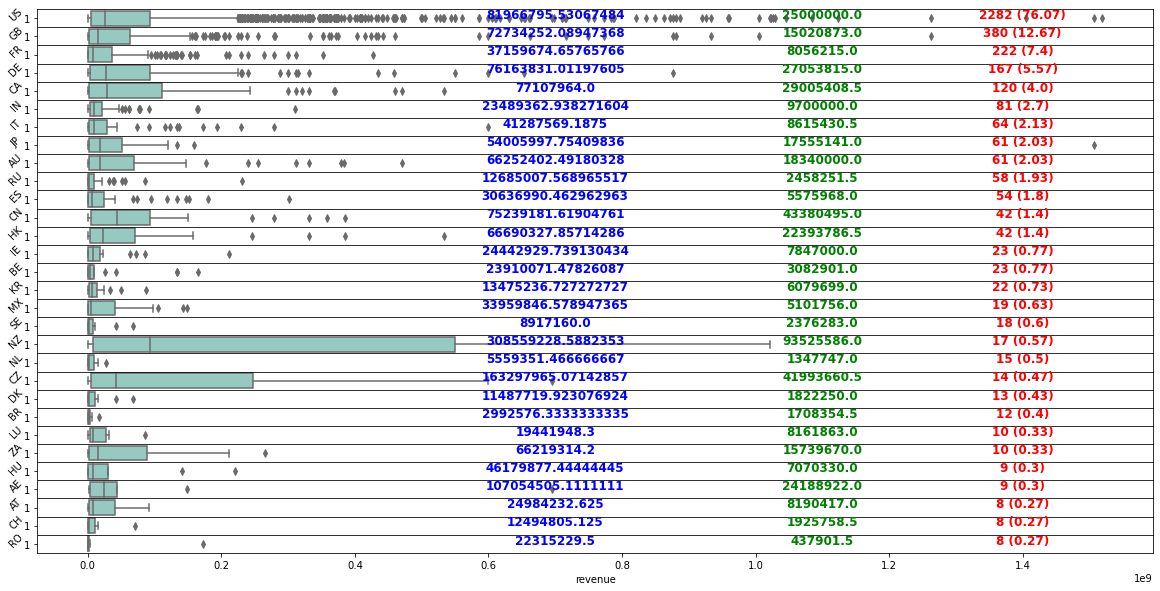

In [671]:
plot_comparison_by_col(x,result_dict["production_countries"],"production_countries",30)

In [ ]:
["NZ","CZ","CA","DE","US","ZA","CN","HK","AU","GB"]

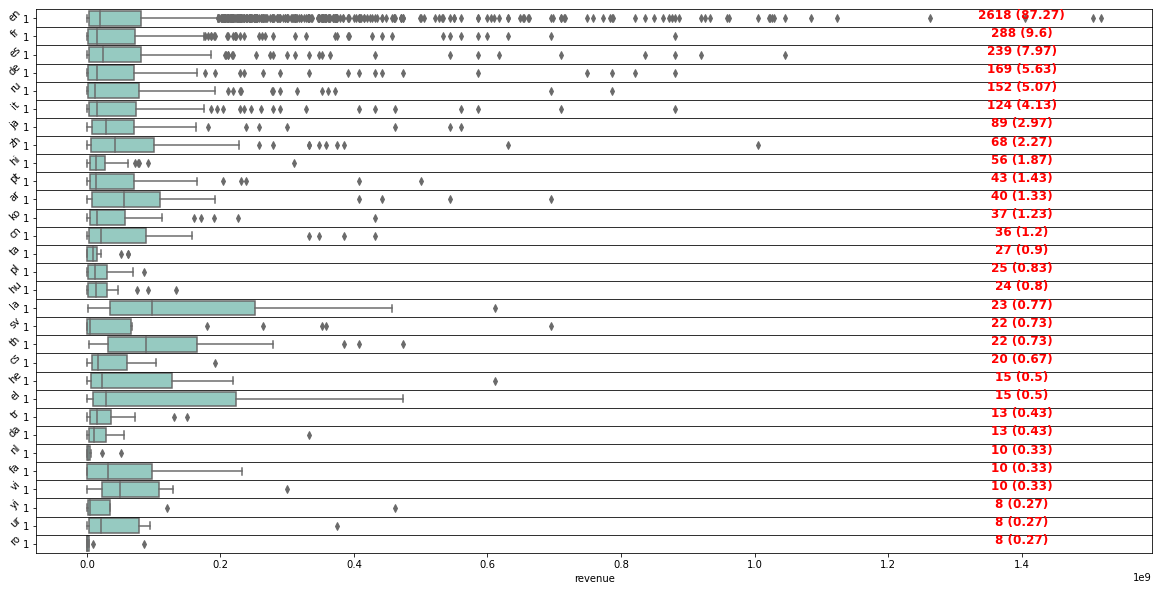

In [578]:
plot_comparison_by_col(x,result_dict["spoken_languages"],"spoken_languages",30)

In [665]:
val = get_median(x,"spoken_languages","fr")
list_of_items(x,result_dict["spoken_languages"],"spoken_languages",25,val)

['en', 'fr', 'es', 'ja', 'zh', 'ar', 'cn', 'la', 'th', 'cs', 'he', 'el']

In [ ]:
list_spoken_languages = {"top_revenue":['zh', 'ar', 'la', 'th'],"medium_revenue":['en', 'fr', 'es', 'ja', 'cn', 'cs', 'he', 'el']}

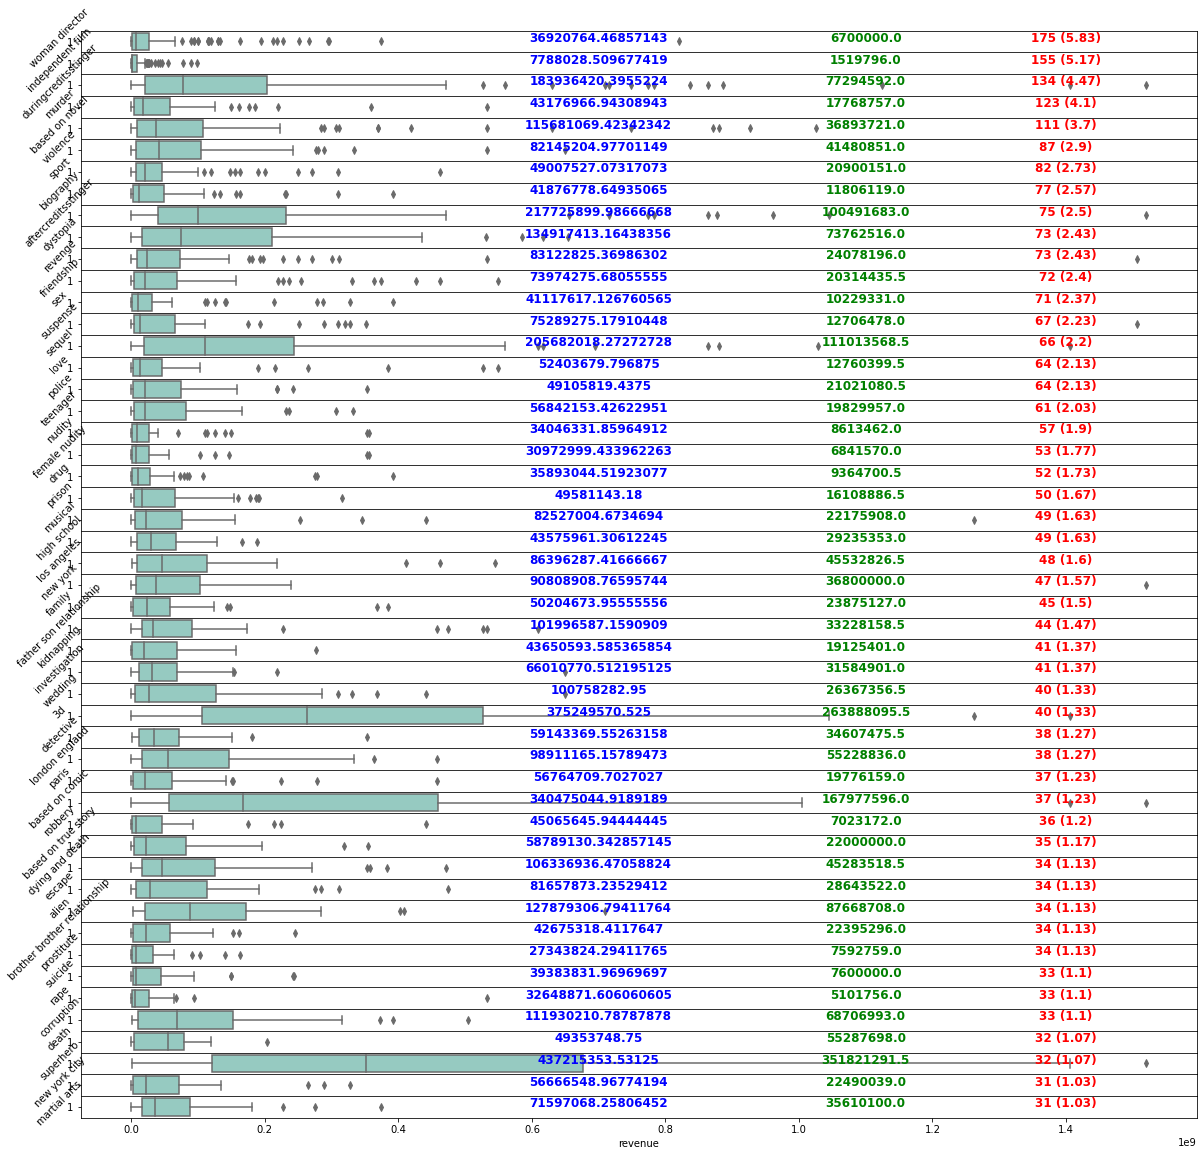

In [684]:
plot_comparison_by_col(x,result_dict["Keywords"],"Keywords",50)

In [696]:
val = get_median(x,"Keywords","corruption")
top_revenue = list_of_items(x,result_dict["Keywords"],"Keywords",50,val)

In [707]:
val = get_median(x,"Keywords","sport")
medium_revenue = list_of_items(x,result_dict["Keywords"],"Keywords",50,val)
ele = [i for i in medium_revenue if i not in top_revenue]
ele

['based on novel',
 'violence',
 'sport',
 'revenge',
 'police',
 'musical',
 'high school',
 'los angeles',
 'new york',
 'family',
 'father son relationship',
 'investigation',
 'wedding',
 'detective',
 'london england',
 'based on true story',
 'dying and death',
 'escape',
 'brother brother relationship',
 'death',
 'new york city',
 'martial arts']

In [697]:
top_revenue

['duringcreditsstinger',
 'aftercreditsstinger',
 'dystopia',
 'sequel',
 '3d',
 'based on comic',
 'alien',
 'corruption',
 'superhero']

In [ ]:
list_keyword = {"top_revenue": ['duringcreditsstinger', 'aftercreditsstinger', 'dystopia', 'sequel', '3d', 'based on comic', 'alien', 'corruption', 'superhero'] ,
                "medium_revenue":['based on novel', 'violence', 'sport', 'revenge', 'police', 'musical', 'high school', 'los angeles', 'new york', 'family', 'father son relationship',
                 'investigation', 'wedding', 'detective', 'london england', 'based on true story', 'dying and death', 'escape', 'brother brother relationship',
                 'death', 'new york city', 'martial arts']}


In [574]:
len(result_dict["production_countries"])

74

In [ ]:

def category_split(df,col_values,col):
    temp_data=df.copy()
    for ele in col_values:
        temp_data[col+"_"+ele[0]]=temp_data[col].apply(lambda x : 1 if ele[0] in x else 0)
    
    return temp_data

In [586]:
x[x["is_english_original_language"]==1]["revenue"].median()

20240128.0

In [609]:
def list_of_items_by_cutoff(df,col_list,col,n,cutoff):
    if n > len(col_list):
        n=len(col_list)
    i=0
    col_list=col_list[:n]
    ans=[]
    for ele in col_list:
        temp_df=df[df[col+"_"+ele[0]]==1]
        value=temp_df["revenue"].median()
        if value >= cutoff:
            ans.append(ele[0])
    return ans
        
    
    
def list_of_items(df,col_list,col,n,cutoff):
    mp = top_category(df,col_list,col)
#     print(mp.columns)
    return list_of_items_by_cutoff(mp,col_list,col,n,cutoff)

def get_median(df,col,col_value):
    temp_data=df.copy()
    temp_data[col_value]=temp_data[col].apply(lambda x : 1 if col_value in x else 0)
    med=temp_data[temp_data[col_value]==1]["revenue"].median()
    return med

In [648]:
val

15020873.0

In [649]:
val = get_median(x,"production_countries","GB")
list_of_items(x,result_dict["production_countries"],"production_countries",20,val)

['US', 'GB', 'DE', 'CA', 'JP', 'AU', 'CN', 'HK', 'NZ']

In [767]:
list_countries ={ "top" : ['CN', 'NZ'] , "medium":['US', 'GB', 'DE', 'CA', 'JP', 'AU', 'HK']}
list_generes = {"top":['Adventure', 'Family'],"medium":['Thriller','Action','Crime', 'Science Fiction','Fantasy','Animation']}
list_spoken_languages = {"top":['zh', 'ar', 'la', 'th'],"medium":['en', 'fr', 'es', 'ja', 'cn', 'cs', 'he', 'el']}
list_companies={"top":['Walt Disney Pictures', 'Village Roadshow Pictures', 'Dune Entertainment'] , "medium":['Warner Bros.','Universal Pictures','Columbia Pictures','New Line Cinema','Columbia Pictures Corporation','Relativity Media','Regency Enterprises','Working Title Films']}
list_keyword = {"top": ['duringcreditsstinger', 'aftercreditsstinger', 'dystopia', 'sequel', '3d', 'based on comic', 'alien', 'corruption', 'superhero'] ,
                "medium":['based on novel', 'violence', 'sport', 'revenge', 'police', 'musical', 'high school', 'los angeles', 'new york', 'family', 'father son relationship',
                 'investigation', 'wedding', 'detective', 'london england', 'based on true story', 'dying and death', 'escape', 'brother brother relationship',
                 'death', 'new york city', 'martial arts']}


In [779]:
def contains_ele_in_list(list_searching,lst_final):
    for ele in list_searching:
        if ele in lst_final:
            return 1
    return 0
            

def list_of_array_to_3_categories(df,col,col_value):
    temp=df.copy()
    for keys in col.keys():
        temp[col_value+"_"+keys]=temp[col_value].apply(lambda x : contains_ele_in_list(x,col[keys]))
    temp[col_value+"_low"]= temp[col_value+"_top"]|temp[col_value+"_medium"] 
    temp[col_value+"_low"]= temp[col_value+"_low"].apply(lambda x : 1 if x==0 else 0)                                                      
    
    return temp
    

In [53]:
def plot_box(df,col):
    f,axes =f, axes = plt.subplots(3, 1,sharex="all",figsize=(20,10),gridspec_kw={"hspace":0})
    bx=sns.boxplot(y=col+"_top",x="revenue" ,orient="h",data=df[df[col+"_top"]==1], palette="Set3",ax=axes[0])
    bx=sns.boxplot(y=col+"_medium",x="revenue" ,orient="h",data=df[df[col+"_medium"]==1], palette="Set3",ax=axes[1])    
    bx=sns.boxplot(y=col+"_low",x="revenue" ,orient="h",data=df[df[col+"_low"]==1], palette="Set3",ax=axes[2])    

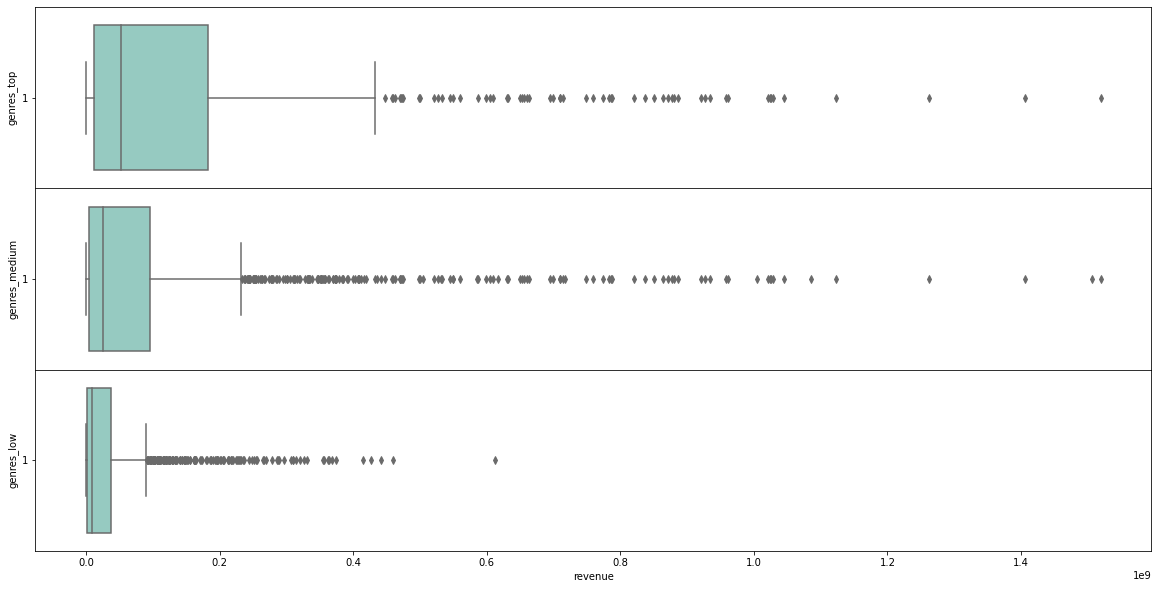

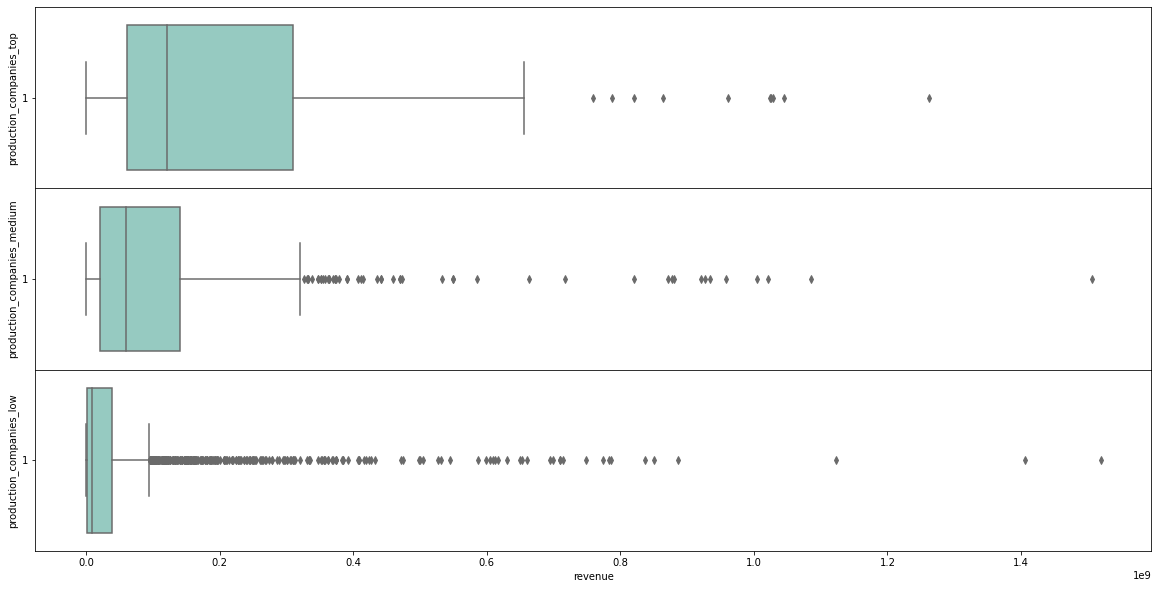

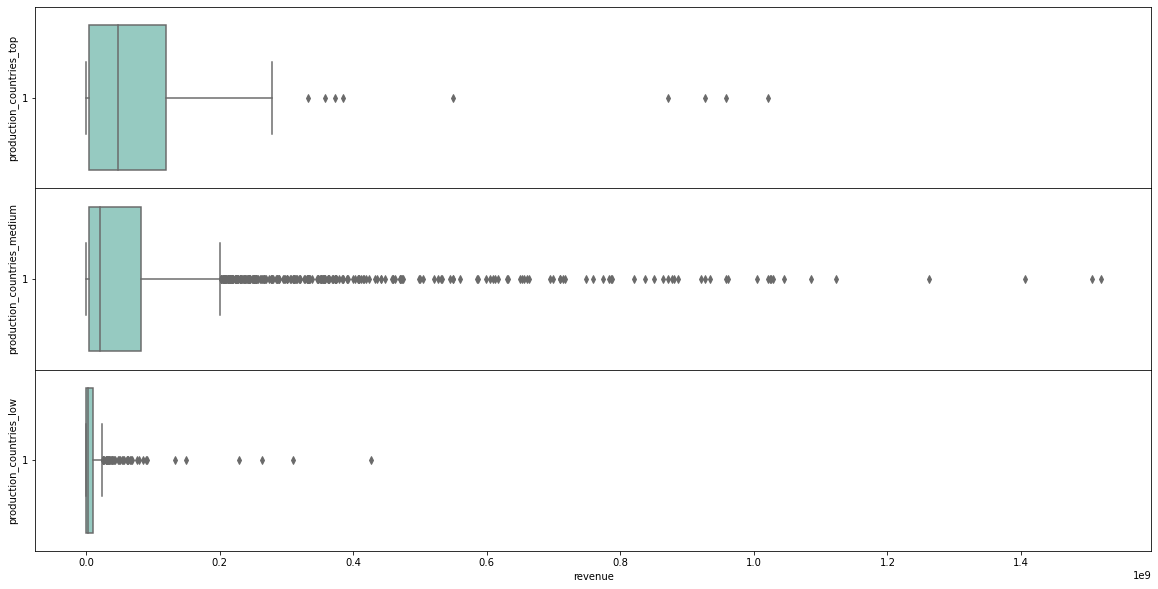

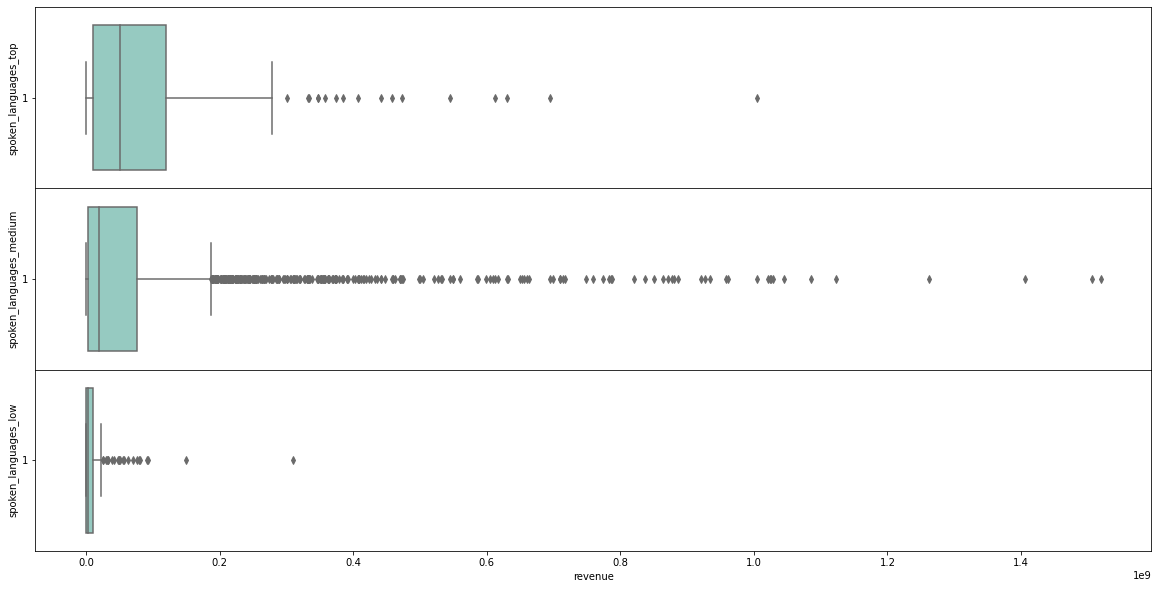

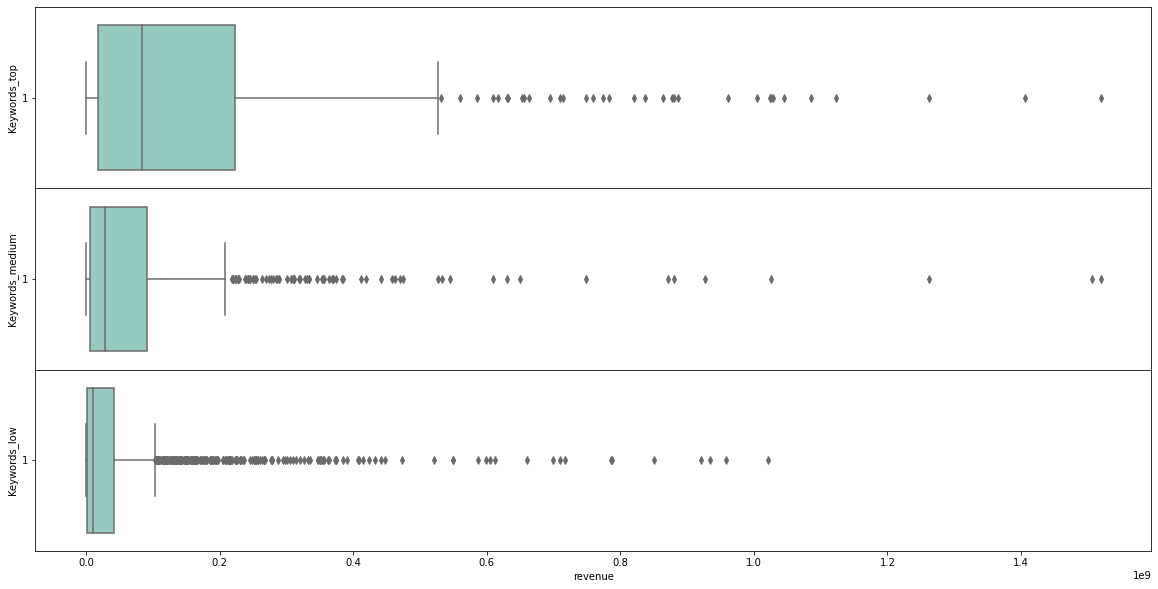

In [56]:
for ele in cols:
    plot_box(df,ele)